In [1]:
# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Python Libraries
import numpy as np
import pandas as pd
from collections import Counter
from math import sqrt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Machine Learning Libraries
import statsmodels.api as sm

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Data Imbalance Treatment Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [3]:
#Setting up Jupyter View
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Reading & Understanding the data

In [4]:
#importing the dataset
telecom = pd.read_csv('telecom_churn_asian_data.csv')

#checking the top 5 rows
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#checking the bottom 5 rows
telecom.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

# Inspect Dataframe

In [6]:
#database dimension
print("Database dimension     :",telecom.shape)
print("Database size          :",telecom.size)
print("Number of Row          :",len(telecom.index))
print("Number of Columns      :",len(telecom.columns))

Database dimension     : (99999, 226)
Database size          : 22599774
Number of Row          : 99999
Number of Columns      : 226


In [7]:
#checking numerical columns statistics
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
#Information  about the column types etc. 
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

Insight:
The data types of the columns are float, integer and object type. We have 179 columsn with float values, 35 columns with integer values and 12 columns with Object Values. Some of the columns are actually Date, they need to be converted to Date Type format. We can see there are some null values in the column. Let's inspect the null values first

# Duplicate Analysis

In [9]:
print("Total number of duplicate values of mobile numbers :" , telecom.duplicated(subset = 'mobile_number').sum())

Total number of duplicate values of mobile numbers : 0


In [10]:
# Creating a copy of original dataframe for duplicate check
telecom_dup = telecom

# Checking for duplicates and dropping the entire duplicate row if any
telecom_dup.drop_duplicates(subset=None, inplace=True)
print ("Original Dataframe Shape                      : ", telecom.shape)
print ("Shape of Dataframe after removing duplicates  : ", telecom_dup.shape)

Original Dataframe Shape                      :  (99999, 226)
Shape of Dataframe after removing duplicates  :  (99999, 226)


Insight:
All Mobile number data are unique and there are no duplicate values.

# Data Cleaning

# Null Value Calculation

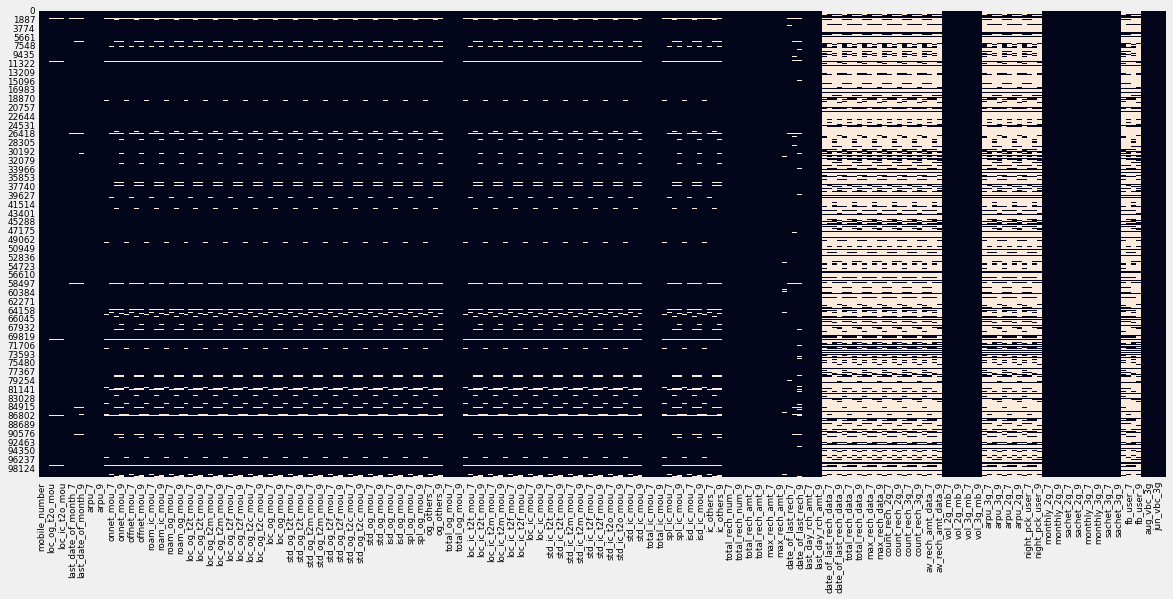

In [11]:
# Plotting the dataframe to check null values and its distribution
plt.figure(figsize = (18,8))
sns.heatmap(telecom.isnull(),cbar = False)
plt.show()

In [12]:
# Function to check column wise null values and % of null values
def null_calc(df):
    #Column wise null values in train data set 
    null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
    null_perc.columns = ['Column Name', 'Null Values Percentage']
    null_value = pd.DataFrame(df.isnull().sum()).reset_index()
    null_value.columns = ['Column Name', 'Null Values']
    null_df = pd.merge(null_value, null_perc, on='Column Name')
    null_df['Null Values Percentage'] = pd.to_numeric(null_df['Null Values Percentage'], errors='coerce')
    null_df = null_df.loc[null_df['Null Values Percentage'] > 0.00] # Keeping only null columns info
    null_df.sort_values("Null Values", ascending = False, inplace=True, ignore_index=True)
    return null_df

In [13]:
# Checking the null values of the telecom dataframe
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,count_rech_2g_6,74846,74.85
1,max_rech_data_6,74846,74.85
2,arpu_3g_6,74846,74.85
3,av_rech_amt_data_6,74846,74.85
4,count_rech_3g_6,74846,74.85
5,night_pck_user_6,74846,74.85
6,arpu_2g_6,74846,74.85
7,fb_user_6,74846,74.85
8,total_rech_data_6,74846,74.85
9,date_of_last_rech_data_6,74846,74.85


In [14]:
# How many columns have null values ? 
print("Total number of columns which have null values are :", null_telecom.shape[0])

# How many columns have more than 70% null values?
print("Total number of columns which have null values more than 70% :", len(null_telecom[null_telecom['Null Values Percentage']>70]))

Total number of columns which have null values are : 166
Total number of columns which have null values more than 70% : 40


Strategy:
There are 40 columns which have more than 70% null values. Ideally we can remove these columns from calculation as imputing values with such high null values will not result in accurate predictor values. But, we need to first analyze the types of columns that have more than 70% null values.
Some of the columns like night_pack_X or fb_user_X (where X signified the month value 6/7/8/9) have high null values. In these cases, we can consider that the particular customer did not take those packages or they did not opt for social media utilities. For such columns, we can impute null values with 0.
We also have to calculate the High Value Customer where as High value customers can be considered as those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months, which signifies the good phase.
Thus, we have to first treat the columns related to recharge amount to identify high value customer.
total_rech_data_6 - 74.85 % missing values
total_rech_data_7 - 74.43 % missing values
av_rech_amt_data_6 - 74.85 % missing values
av_rech_amt_data_7 - 74.43 % missing values
date_of_last_rech_data_6 - 74.85 % missing values
date_of_last_rech_data_7 - 74.43 % missing values

# Null Value Imputation

In [15]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of June
if telecom['total_rech_data_6'].isnull().equals(telecom['date_of_last_rech_data_6'].isnull()):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


Insight:
So we see that the two indexes are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.es.


In [16]:
#Imputing the data for total_rech_data_6 and av_rech_amt_data_6 as 0
telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)

Strategy:
We can follow the same method for confirmation and data imputation for month 7th and 8th.

In [17]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of July(7)
if telecom['total_rech_data_7'].isnull().equals(telecom['date_of_last_rech_data_7'].isnull()):
    print('The indexes for NULL values for month 7 are equal')

# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data information for month of August(8)
if telecom['total_rech_data_8'].isnull().equals(telecom['date_of_last_rech_data_8'].isnull()):
    print('The indexes for NULL values for month 8 are equal')    

The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for month 7 and 8 & the missing values can be imputed with 0.

Also as the total data recharge for the month is 0, we can impute 0 for each of 'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8' columns as well.

In [18]:
# Imputing the data for total_rech_data_7 and av_rech_amt_data_7 as 0
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)

# Imputing the data for total_rech_data_8 and av_rech_amt_data_8 as 0
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)

In [19]:
# Let's check the missing values again
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_6,74846,74.85
1,night_pck_user_6,74846,74.85
2,arpu_3g_6,74846,74.85
3,count_rech_2g_6,74846,74.85
4,arpu_2g_6,74846,74.85
5,count_rech_3g_6,74846,74.85
6,fb_user_6,74846,74.85
7,date_of_last_rech_data_6,74846,74.85
8,night_pck_user_7,74428,74.43
9,date_of_last_rech_data_7,74428,74.43


In [20]:
# Checking the index matching for month 6
arpu_2g_6_index = telecom['arpu_2g_6'].isnull()
arpu_3g_6_index = telecom['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom['count_rech_3g_6'].isnull()
fb_user_6_index = telecom['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_6_index.equals(arpu_2g_6_index) & arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) & count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


In [21]:
# Checking the index matching for month 7
arpu_2g_7_index = telecom['arpu_2g_7'].isnull()
arpu_3g_7_index = telecom['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom['count_rech_3g_7'].isnull()
fb_user_7_index = telecom['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_7_index.equals(arpu_2g_7_index) & arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) & count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [22]:
# Checking the index matching for month 8
arpu_2g_8_index = telecom['arpu_2g_8'].isnull()
arpu_3g_8_index = telecom['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom['count_rech_3g_8'].isnull()
fb_user_8_index = telecom['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_2g_8_index.equals(arpu_2g_8_index) & arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) & count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


A customer having Mobile internet usage missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.

In [23]:
cols_to_impute = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
for col in cols_to_impute:
    telecom[col].fillna(0, inplace=True)

In [24]:
# Let's check the remaining null value columns
null_telecom = null_calc(telecom)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_6,74846,74.85
1,date_of_last_rech_data_6,74846,74.85
2,max_rech_data_7,74428,74.43
3,date_of_last_rech_data_7,74428,74.43
4,av_rech_amt_data_9,74077,74.08
5,max_rech_data_9,74077,74.08
6,total_rech_data_9,74077,74.08
7,date_of_last_rech_data_9,74077,74.08
8,max_rech_data_8,73660,73.66
9,date_of_last_rech_data_8,73660,73.66


In [25]:
# How many columns have null values ? 
print("Total number of columns which have null values are :", null_telecom.shape[0])

# How many columns have more than 70% null values?
print("Total number of columns which have null values more than 70% :", len(null_telecom[null_telecom['Null Values Percentage']>70]))

Total number of columns which have null values are : 136
Total number of columns which have null values more than 70% : 10


Insight:
We have treated 29 columns with high null values(>70%) till now.

In [26]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

Strategy:
Before we start identifying high value customers, let's review if the revenue data has any data discripancies or not.

In [27]:
telecom[['arpu_6', 'arpu_7', 'arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731
std,328.439770,338.156291,344.474791
min,-2258.709000,-2014.045000,-945.808000
25%,93.411500,86.980500,84.126000
50%,197.704000,191.640000,192.080000
75%,371.060000,365.344500,369.370500
max,27731.088000,35145.834000,33543.624000


Insight:
The above statistical description of the ARPU - Average Revenue Per User column gives some important insight. The MINIMUM value for all the arpu related columns are NEGATIVE. Now as per the definition of ARPU which says -

"The average revenue per user is the average billing per customer earned by the telecom company every month".

Now the revenue generated from a user cannot be negative. If a customer is not using any services then arpu for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [28]:
# Total number of such observations for month 6,7,8
print('Total observations with negative arpu values for month 6 :' , len(telecom[telecom['arpu_6']<0]))
print('Total observations with negative arpu values for month 7 :' , len(telecom[telecom['arpu_7']<0]))
print('Total observations with negative arpu values for month 8 :' , len(telecom[telecom['arpu_8']<0]))

Total observations with negative arpu values for month 6 : 416
Total observations with negative arpu values for month 7 : 498
Total observations with negative arpu values for month 8 : 508


In [29]:
# Let's delete the rows where arpu_X with negative values

telecom = telecom[(telecom['arpu_6'] >= 0) & 
                  (telecom['arpu_7'] >= 0) & 
                  (telecom['arpu_8'] >= 0)]
telecom.shape

(98587, 226)

In [30]:
telecom[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,98587.000000,98587.000000,98587.000000
mean,284.728782,281.084361,281.282791
std,328.702612,338.672390,344.949429
min,0.000000,0.000000,0.000000
25%,94.556000,88.683500,85.905500
50%,199.200000,194.041000,194.232000
75%,372.856500,368.132000,371.490000
max,27731.088000,35145.834000,33543.624000


We have deleted 1412 rows of data which 1.4% of overall data. This will not impact much on our analysis. Now let's try to identify high value customers next.

# High Value Customer

Strategy:
Now we have values for 'total_rechdata' and 'av_rech_amtdata' (for months 6, 7, 8 & 9). Using these 2 values, we can derive new features for the respective months called total_data_rech_amt which equals total_rechdata * av_rech_amtdata
Also this new feature would help us in computing the total data recharge amount : 'total_data_rech_amt' for the months 6, 7, 8 & 9.

In [31]:
# calculating total_data_rech_amt
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months which are the good phases.

In [32]:
# Lets compute the average recharge amount for the month 6 & 7. 
#This total amount is equal to the sum of talk time recharge and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  240.75


In [33]:
# Filtering the high value customers

tele_highval_cust = telecom[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

# resetting the index
tele_highval_cust = tele_highval_cust.reset_index(drop=True)

tele_highval_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,

In [34]:
# high value customer database dimension
print("Database dimension     :",tele_highval_cust.shape)
print("Database size          :",tele_highval_cust.size)
print("Number of Row          :",len(tele_highval_cust.index))
print("Number of Columns      :",len(tele_highval_cust.columns))

Database dimension     : (29591, 230)
Database size          : 6805930
Number of Row          : 29591
Number of Columns      : 230


Insight:
We have successfully identified 'High Value Customers' and created a separate dataframe containing High Value Customers' data.

# Customer Churn Calculation

In [35]:
tele_highval_cust['churn'] = tele_highval_cust.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [36]:
# Let's check if our analysis matches with what we wanted to calculate for churn : 
tele_highval_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
1,0.00,0.00,0.00,0.00,1
2,34.91,142.18,0.00,0.00,0
3,252.61,1031.53,0.00,0.00,0
4,127.48,127.63,13.93,314.74,0


In [37]:
# We will try to get all the columns in the 'tele_highval_cust' dataset where the column have '_9' in the name.

cols_with_9 = [col for col in tele_highval_cust.columns if '_9' in col]
cols_with_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [38]:
# We will be dropping the 9 month data. Let's check how many column data we are about to drop 
print("Number of columns to be dropped : ", len(cols_with_9))

Number of columns to be dropped :  56


In [39]:
#dropping the columns with 9th month data
tele_highval_cust.drop(cols_with_9,axis = 1, inplace = True)
print("Number of Columns remaining:",len(tele_highval_cust.columns))

Number of Columns remaining: 175


# Null Imputation for High Value Customer Data Frame

In [40]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,max_rech_data_8,13740,46.43
1,date_of_last_rech_data_8,13740,46.43
2,max_rech_data_6,12977,43.85
3,date_of_last_rech_data_6,12977,43.85
4,max_rech_data_7,12670,42.82
5,date_of_last_rech_data_7,12670,42.82
6,loc_ic_t2f_mou_8,1088,3.68
7,std_ic_t2m_mou_8,1088,3.68
8,loc_og_t2c_mou_8,1088,3.68
9,std_ic_t2t_mou_8,1088,3.68


In [41]:
# How many columns have more than 40% null values?
print("Total number of columns which have null values more than 40% :", len(null_telecom[null_telecom['Null Values Percentage']>40]))

Total number of columns which have null values more than 40% : 6


In [42]:
#dropping the date_of_last_rech_data_X columns
tele_highval_cust.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis = 1, inplace = True)
print("Number of Columns remaining:",len(tele_highval_cust.columns))

Number of Columns remaining: 172


Next we will review 'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'

In [43]:
# checking the data distribution of these 3 columns : 
tele_highval_cust[['max_rech_data_6', 'max_rech_data_7' , 'max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16614.000000,16921.000000,15851.000000
mean,139.744192,140.500561,136.448300
std,118.743427,120.291309,119.687372
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


In [44]:
# How many rows are null ?
print ("Total NULL values for max_rech_data_6 column : ",tele_highval_cust.max_rech_data_6.isnull().sum())
print ("Total NULL values for max_rech_data_7 column : ",tele_highval_cust.max_rech_data_7.isnull().sum())
print ("Total NULL values for max_rech_data_8 column : ",tele_highval_cust.max_rech_data_8.isnull().sum())

Total NULL values for max_rech_data_6 column :  12977
Total NULL values for max_rech_data_7 column :  12670
Total NULL values for max_rech_data_8 column :  13740


In [45]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    tele_highval_cust[col].fillna(0, inplace=True)

In [46]:
# now let's check the remaining null values for rest of the columns 
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage
0,loc_og_t2m_mou_8,1088,3.68
1,std_ic_t2m_mou_8,1088,3.68
2,std_ic_t2t_mou_8,1088,3.68
3,std_og_mou_8,1088,3.68
4,loc_ic_mou_8,1088,3.68
5,loc_og_t2f_mou_8,1088,3.68
6,loc_ic_t2f_mou_8,1088,3.68
7,loc_og_t2c_mou_8,1088,3.68
8,loc_ic_t2m_mou_8,1088,3.68
9,loc_og_mou_8,1088,3.68


There are three date columns date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8.#It is not possible to impute these data. We will drop these columns as it will not be useful for prediction. Also another 3 date columns of last_date_of_month_X has same value in all row. These are not useful so we will drop them.

In [47]:
# Delete all the date columns
tele_highval_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                        'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis = 1, inplace = True)
tele_highval_cust.shape

(29591, 166)

In [48]:
# Let's store the null columns as a list first
cols_null = tele_highval_cust.columns[tele_highval_cust.isna().any()].tolist()
print(cols_null)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_m

In [49]:
# Let's impute these data with 0

for col in cols_null:
    tele_highval_cust[col].fillna(0, inplace=True)  

In [50]:
# Now let't check if there are any columns which have null values
null_telecom = null_calc(tele_highval_cust)
null_telecom

,Column Name,Null Values,Null Values Percentage


In [51]:
# Let's check what is our dataframe size currently
tele_highval_cust.shape

(29591, 166)

# Delete Unnecessary Columns

In [52]:
#Variance 
columns_with_0_variance = tele_highval_cust.var() == 0
print("Total columns with ZERO variance are : ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

Total columns with ZERO variance are :  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [53]:
# We will drop these columns where variance is 0
tele_highval_cust.drop(column_name_with_0_variance,axis=1, inplace = True)
tele_highval_cust.shape

(29591, 157)

Strategy:
Looking at the problem statement, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity. We will also delete the mobile_number column as it will not be needed for prediction purpose.

In [54]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'mobile_number']

tele_highval_cust.drop(individual_cols, axis = 1, inplace = True)

tele_highval_cust.shape

(29591, 105)

# Categorical Columns Conversion

Strategy:
Some of the columns have binary data - 0/1. We need to identify them and convert them as Ordered Categorical Column.

In [55]:
# Checking the unique values in the dataframe
#funtion for creation a dataframe to record the columns, their unique values and unique value counts

def frequency_info(df):
    df_result = pd.DataFrame(columns=["columns","values","unique_values"])
    
    df_temp=pd.DataFrame()
    for value in df.columns:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("unique_values", ascending =True, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [56]:
# Let's check the unique values to identify which can be categorical columns
frequency_info(tele_highval_cust)

,values,unique_values
columns,,
circle_id,[109],1
fb_user_8,"[1.0, 0.0]",2
fb_user_7,"[1.0, 0.0]",2
fb_user_6,"[1.0, 0.0]",2
night_pck_user_8,"[0.0, 1.0]",2
night_pck_user_7,"[0.0, 1.0]",2
night_pck_user_6,"[0.0, 1.0]",2
churn,"[1, 0]",2
monthly_2g_6,"[0, 2, 1, 3, 4]",5


In [57]:
# We will convert the columns which have 2 values to an ordered categorical column and convert it to int type
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

tele_highval_cust[category_list] = tele_highval_cust[category_list].astype(int)

tele_highval_cust[category_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29591 non-null  int32
 1   night_pck_user_7  29591 non-null  int32
 2   night_pck_user_8  29591 non-null  int32
 3   fb_user_6         29591 non-null  int32
 4   fb_user_7         29591 non-null  int32
 5   fb_user_8         29591 non-null  int32
dtypes: int32(6)
memory usage: 693.7 KB


# Exploratory Data Analysis

First we will segregate categorical and numerical columns. The categorical columns in this data frames are ordinal categorical columns. We will convert all these columns to integer type.

In [58]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 
            'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
num_cols = tele_highval_cust.dtypes[(tele_highval_cust.dtypes == "float64") | (tele_highval_cust.dtypes == "int64") | (tele_highval_cust.dtypes == "int32")].index.to_list()
for col in cat_cols:
    num_cols.remove(col) 
num_cols.remove('churn')

In [59]:
print("CATEGORICAL FEATURES : \n {} \n\n".format(cat_cols))
print("NUMERICAL FEATURES : \n {} \n\n".format(num_cols))

CATEGORICAL FEATURES : 
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'] 


NUMERICAL FEATURES : 
 ['circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', '

# Imbalance Analysis

We need to check the imbalance in Customer Churn Data. If the data is highly imbalanced, we need to use proper methods to negate the effect of imbalance in our prediction models.

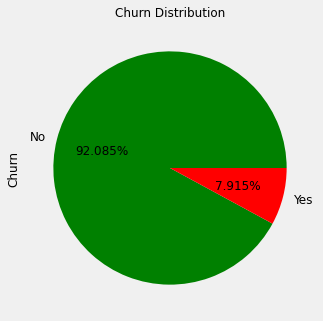

In [60]:
# Checking the customer churn distribution
ax = (tele_highval_cust['churn'].value_counts()*100.0 /len(tele_highval_cust)).plot.pie(autopct='%.3f%%', 
                                                                                        labels = ['No', 'Yes'],
                                                                                        colors =['g','r'],
                                                                                        figsize =(5,5), 
                                                                                        fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

# Categorical Data Analysis

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


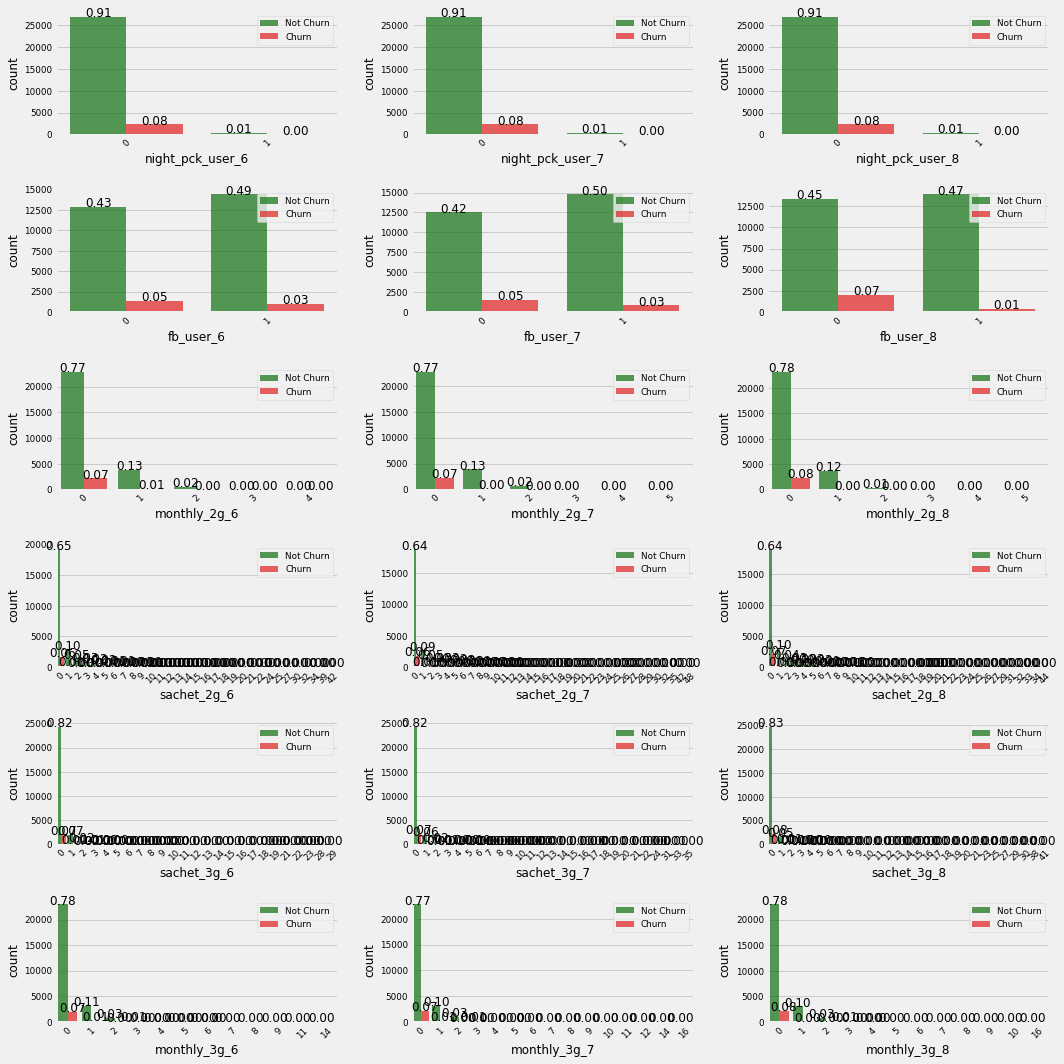

In [61]:
fig, axes = plt.subplots(round(len(cat_cols) / 3), 3, figsize=(15, 15))

total = float(len(tele_highval_cust))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_cols[i], alpha=0.7, data=tele_highval_cust, hue=tele_highval_cust['churn'], palette=['g', 'r'], ax=ax)
        # Renaming the Legends from 0/1 to Not Churn/Churn
        ax.legend(['Not Churn', 'Churn'], loc="upper right")
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(cat_cols[i], fontsize=12)
        ax.set_ylabel('count', fontsize=12)
        # adding annotations
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/total),
                    ha="center",
                    fontsize=12)
        
fig.tight_layout()

# Numerical Data Analysis

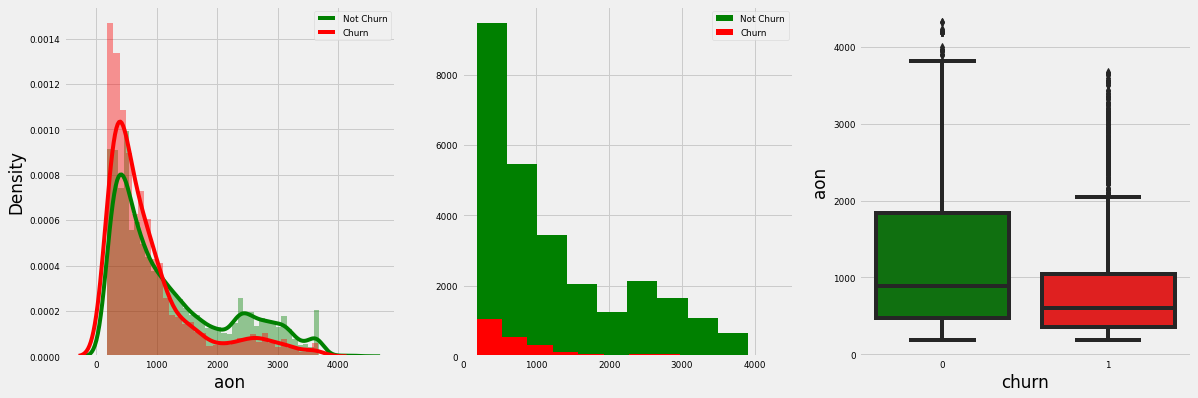

In [62]:
# Data Distribution
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.distplot(tele_highval_cust.loc[tele_highval_cust['churn']==0,'aon'],hist=True, color = 'g')
sns.distplot(tele_highval_cust.loc[tele_highval_cust['churn']==1,'aon'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,2)
plt.hist(tele_highval_cust.loc[tele_highval_cust['churn']==0,'aon'],color = 'g')
plt.hist(tele_highval_cust.loc[tele_highval_cust['churn']==1,'aon'],color = 'r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,3)
sns.boxplot(y='aon', data=tele_highval_cust, x='churn',palette =['g','r'])

plt.show()

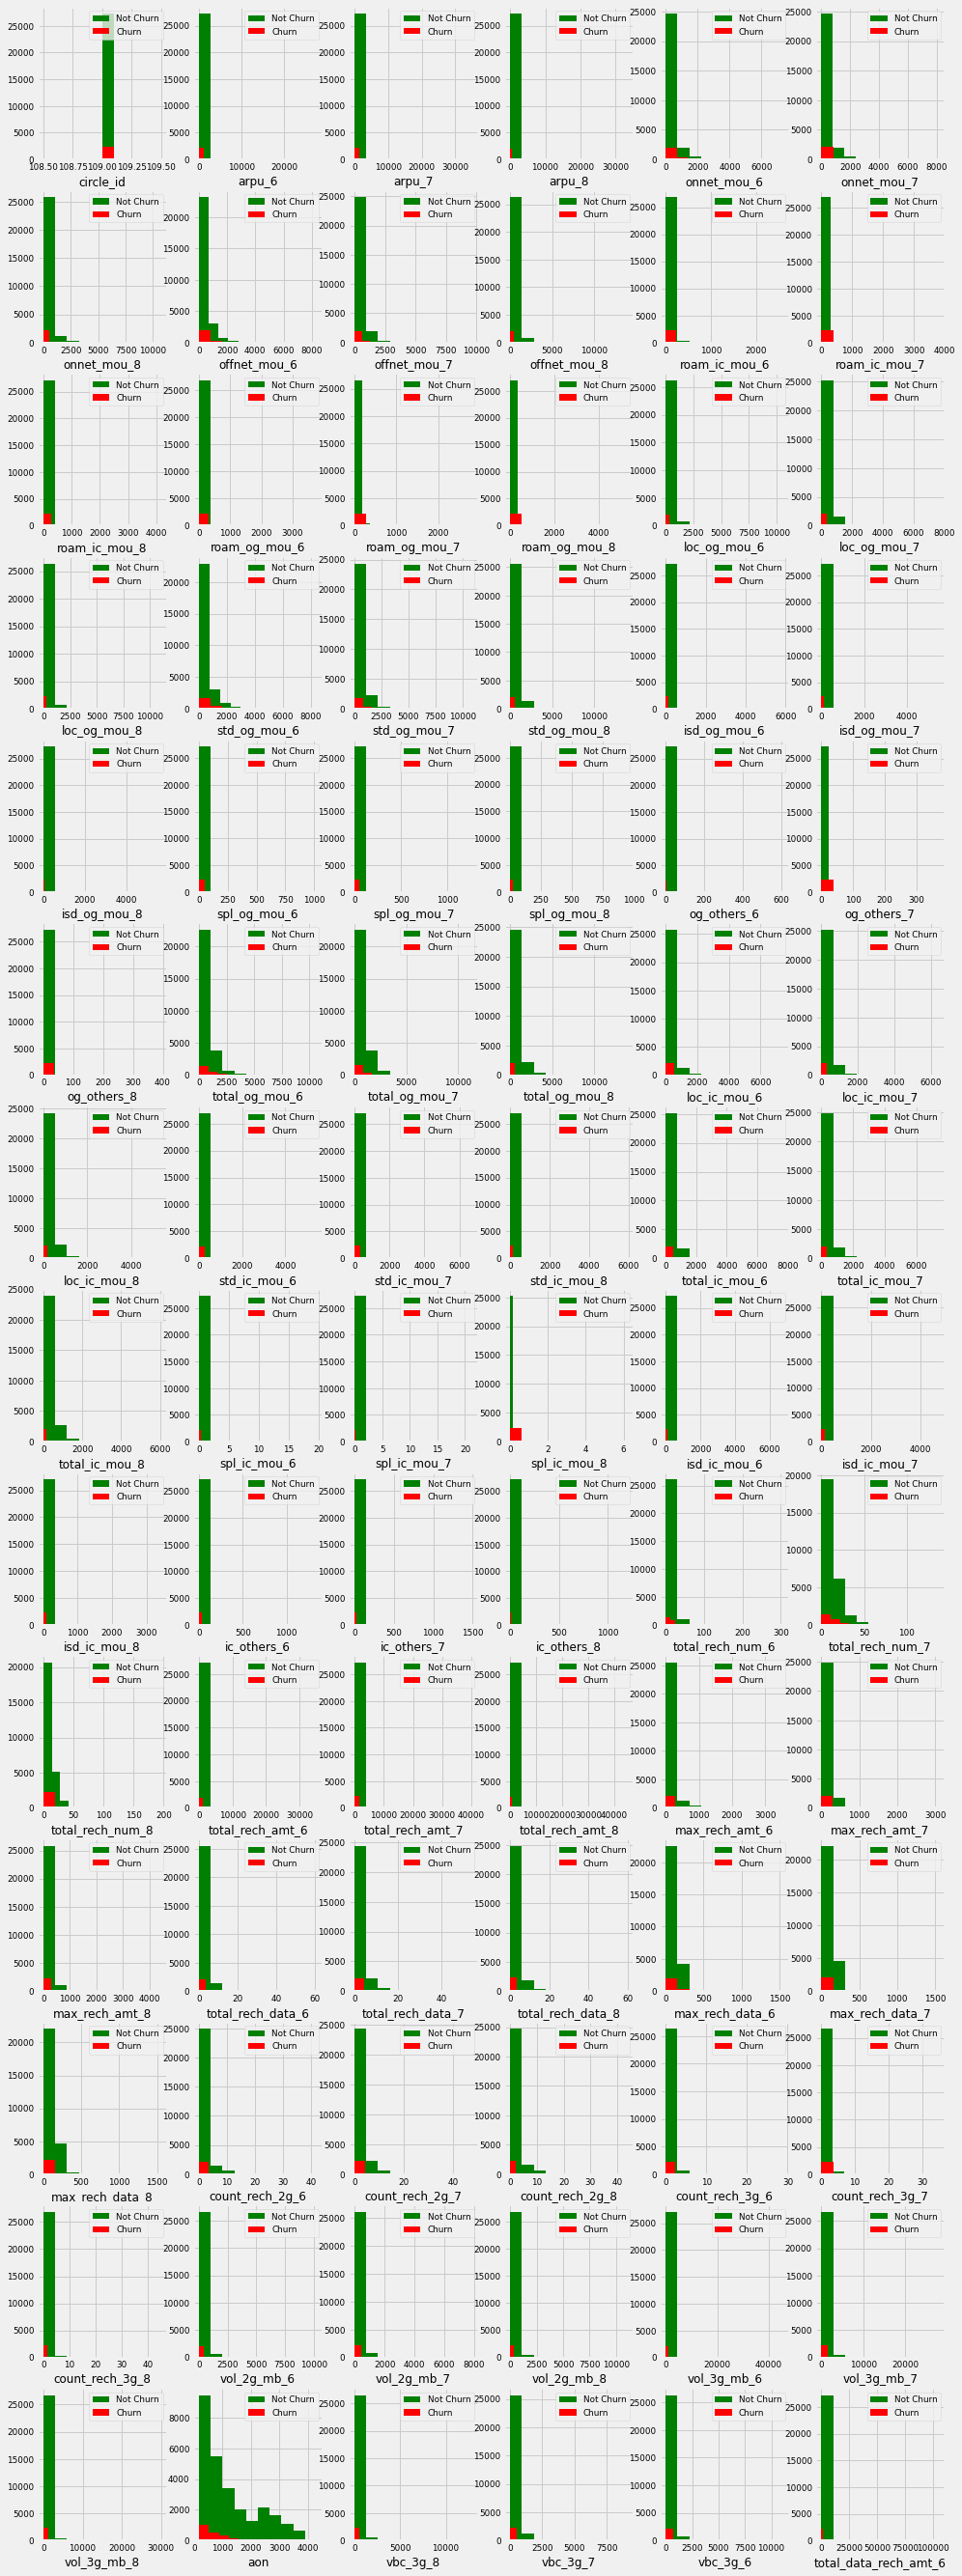

In [63]:
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.hist(tele_highval_cust.loc[tele_highval_cust['churn']==0, num_cols[i]],color='g')
        ax.hist(tele_highval_cust.loc[tele_highval_cust['churn']==1, num_cols[i]],color='r')
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(num_cols[i],fontsize=12)
        ax.legend(['Not Churn','Churn'],loc = 'best')        
plt.show()

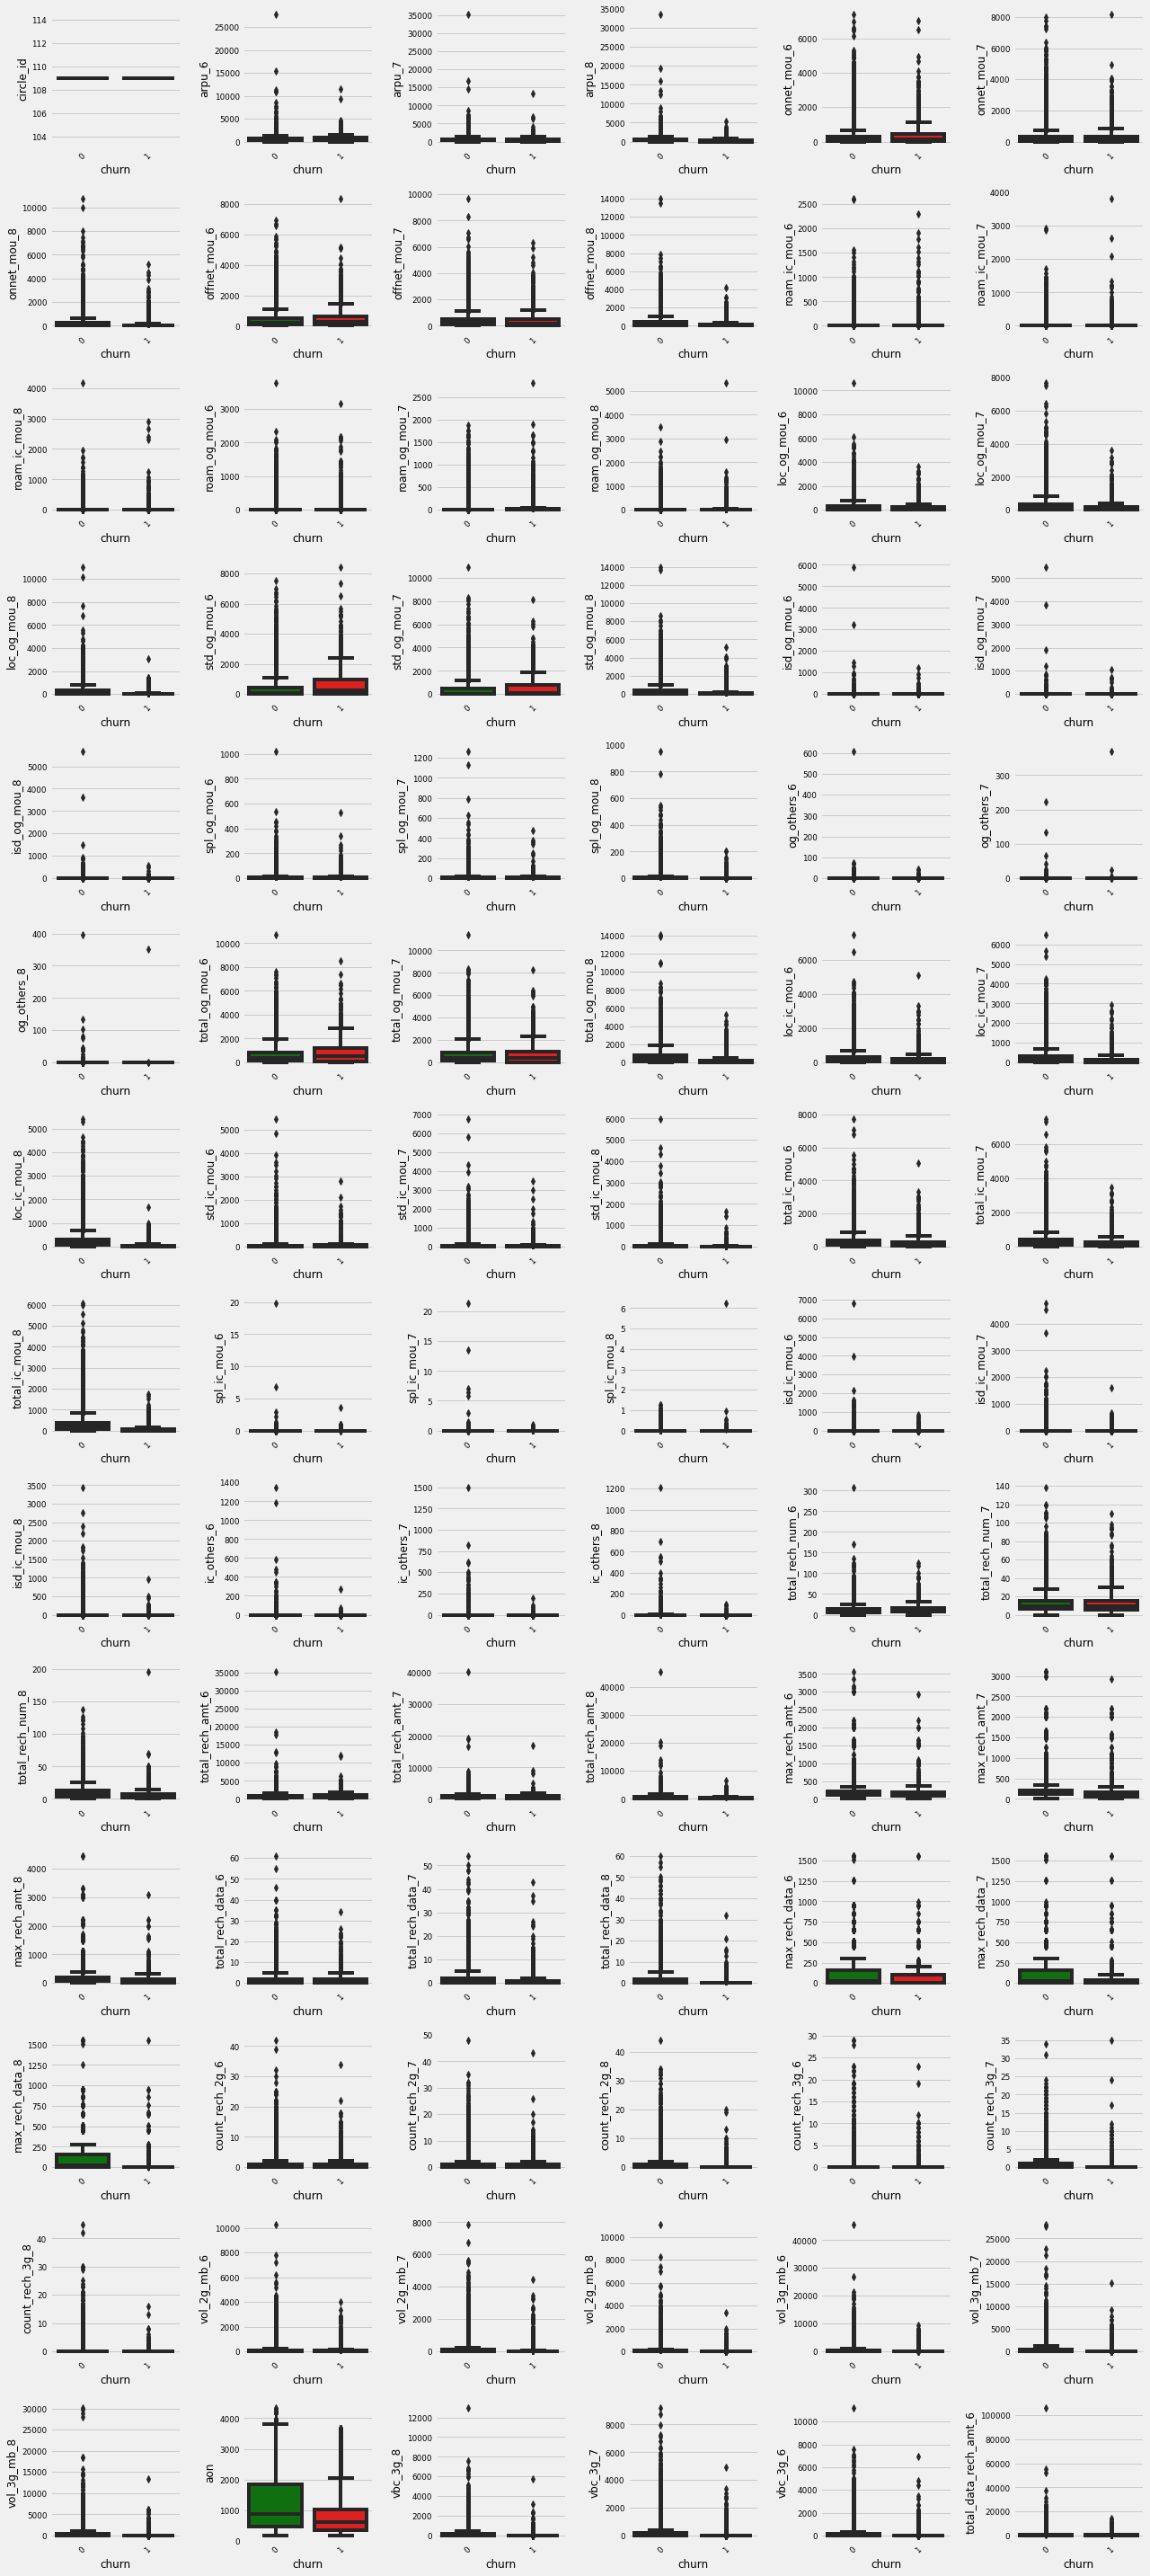

In [64]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

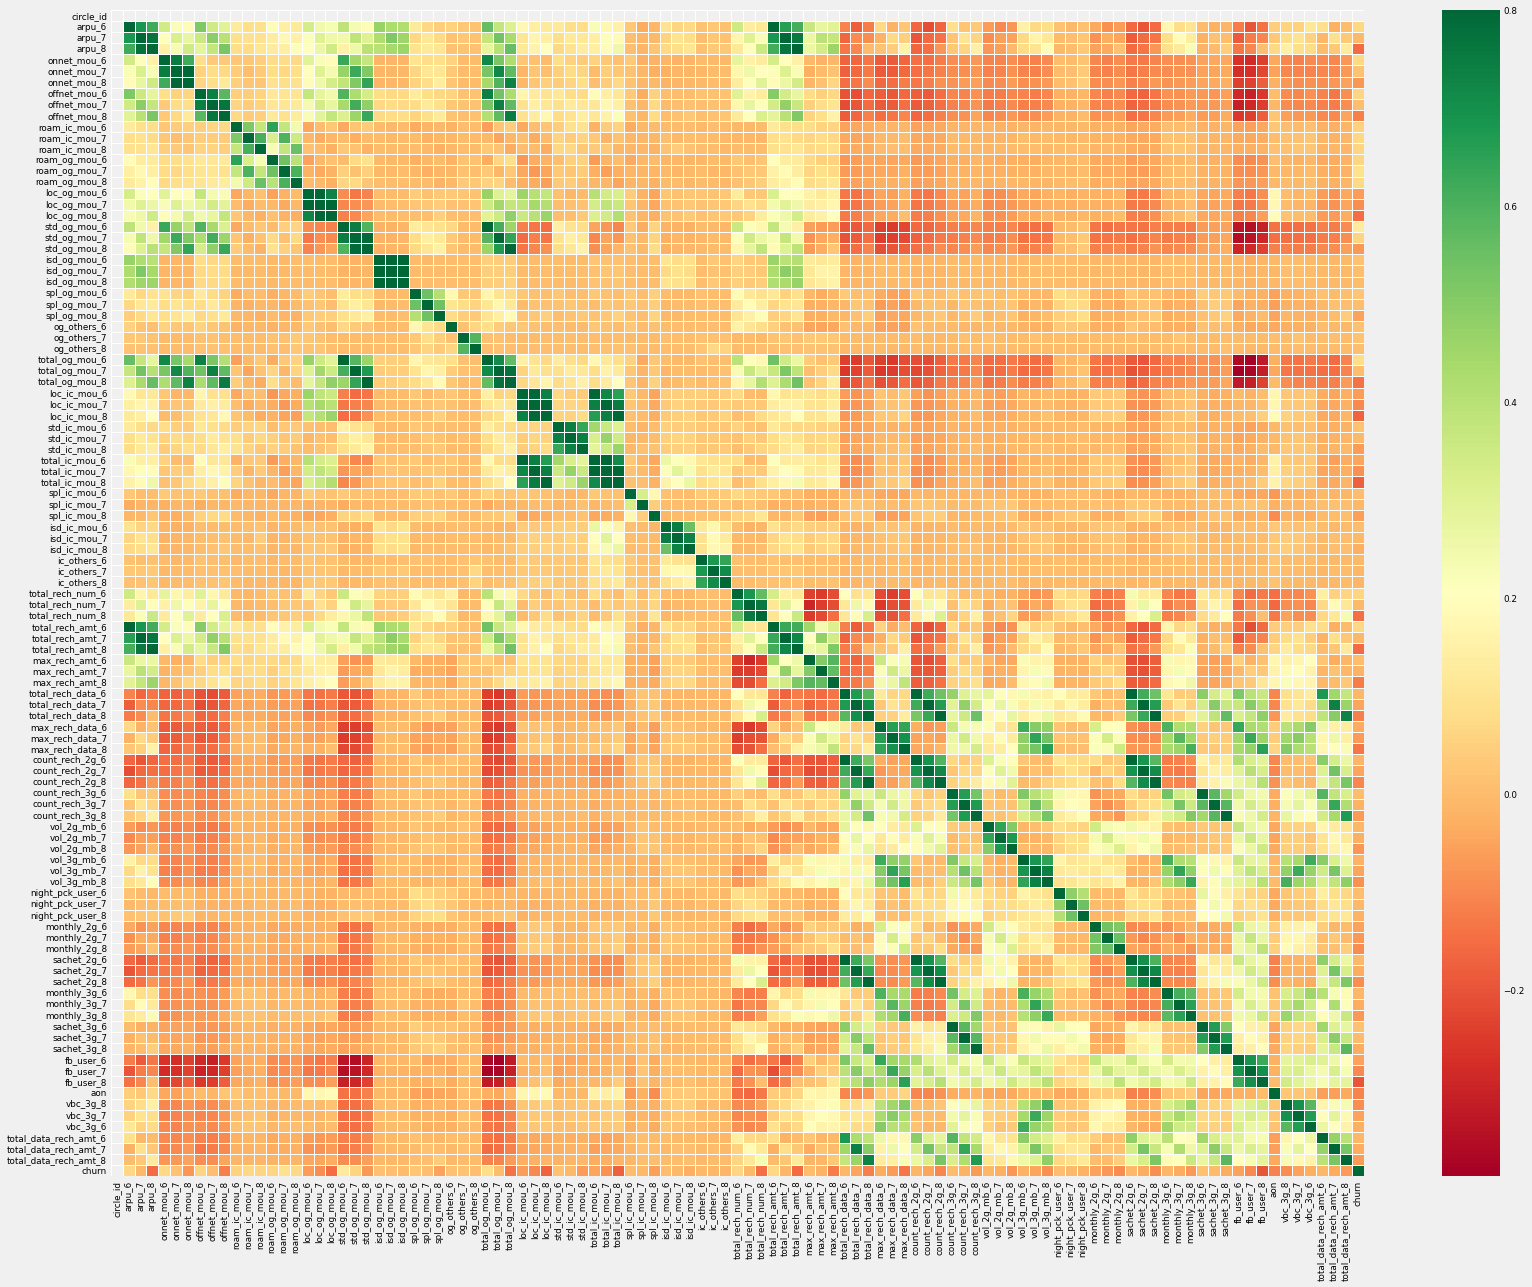

In [65]:
# Checking the correlation matrix
corrmat = tele_highval_cust.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrmat, vmax=.8,cmap="RdYlGn",linewidth =1)
plt.show()

In [66]:
# Checking the top correlated features
corr_matrix = tele_highval_cust.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


# Data Preparation

# Outliers Treatment

In [67]:
#Find skewed numerical features
skew_features = tele_highval_cust[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.2 ".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 85 numerical features with Skew > 0.2 


og_others_7              111.136693
og_others_6              109.666418
og_others_8               99.486834
isd_og_mou_8              88.957842
isd_og_mou_6              87.011130
isd_og_mou_7              83.406637
spl_ic_mou_7              72.455557
ic_others_6               58.476965
ic_others_8               46.938700
ic_others_7               44.139529
spl_ic_mou_6              41.540185
isd_ic_mou_6              34.696418
isd_ic_mou_7              24.405269
total_data_rech_amt_6     22.639450
spl_og_mou_7              19.449973
total_data_rech_amt_8     19.062494
roam_ic_mou_8             18.590514
total_rech_amt_8          18.073139
arpu_7                    17.681620
isd_ic_mou_8              17.417915
roam_ic_mou_7             17.264460
total_rech_amt_7          16.200891
arpu_8                    15.417555
spl_og_mou_6              15.414604
roam_og_mou_8             14.479325
spl_og_mou_8              14.429340
std_ic_mou_7              13.514776
total_rech_amt_6          13

In [68]:
# We will use Boxcox transformation for numerical variables 

for i in skew_index:
    tele_highval_cust[i] = boxcox1p(tele_highval_cust[i], boxcox_normmax(tele_highval_cust[i] + 1))

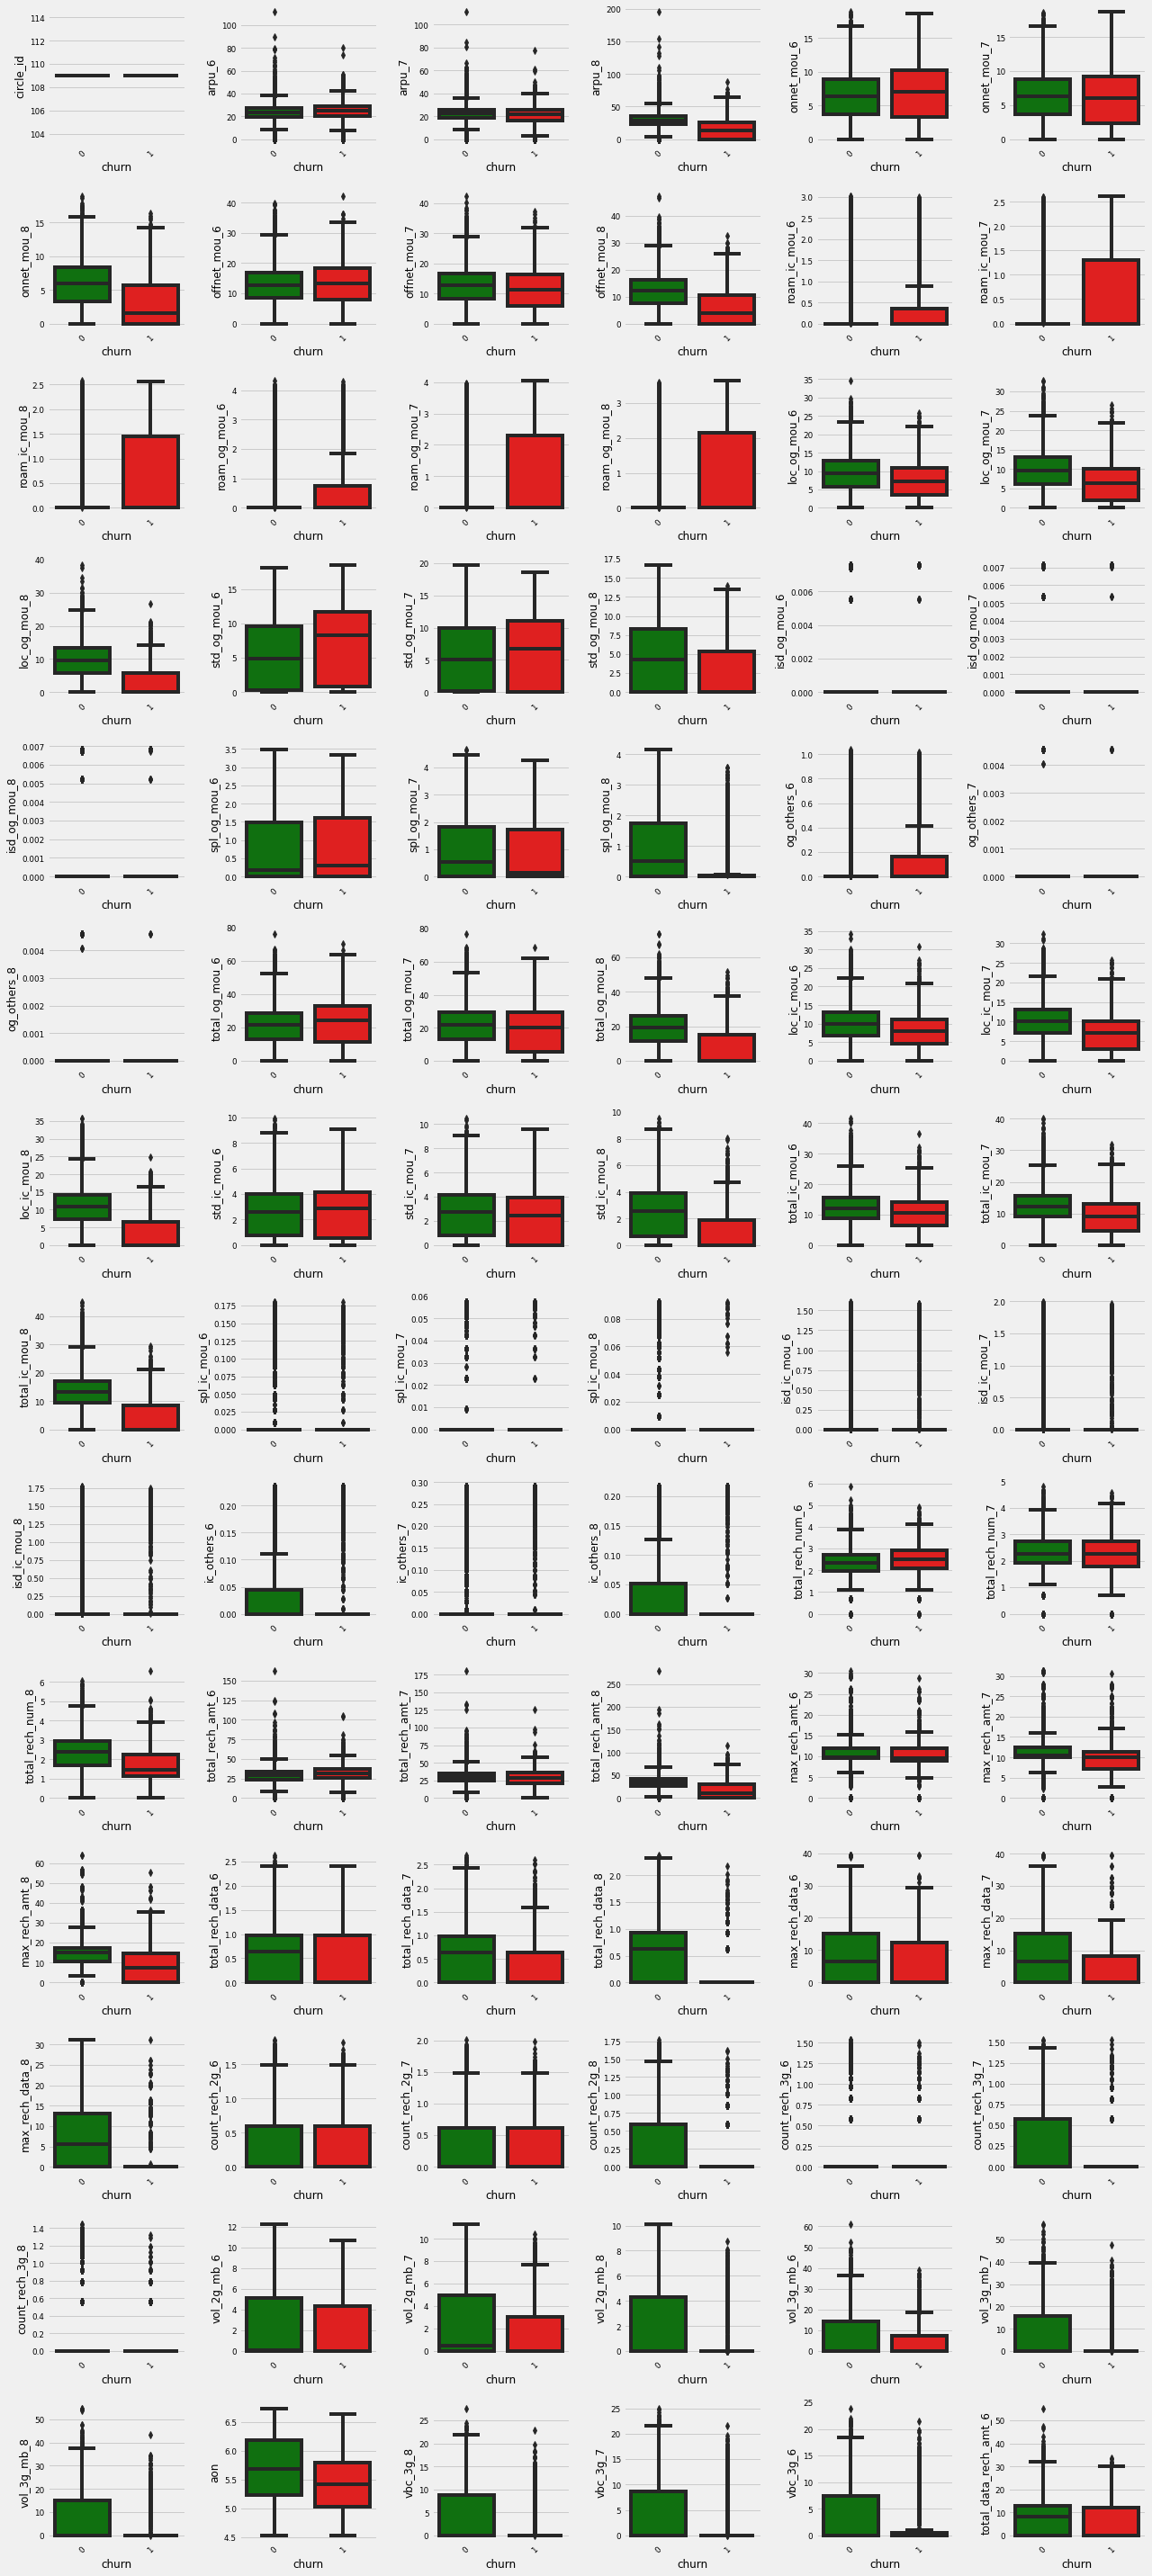

In [69]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=tele_highval_cust, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

# Feature Engineering

In [70]:
tele_highval_cust.columns

Index(['circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'churn'],
      dtype='object', length=105)

In [71]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [72]:
# Creating features for good phase and action phase column : 

cols = ["arpu","onnet_mou","offnet_mou","roam_ic_mou","roam_og_mou","loc_og_mou","std_og_mou",
        "isd_og_mou","spl_og_mou","og_others","total_og_mou","loc_ic_mou","std_ic_mou",
        "spl_ic_mou","isd_ic_mou","ic_others","total_ic_mou","total_rech_num","total_rech_amt",
        "max_rech_amt","total_rech_data","max_rech_data","count_rech_2g","count_rech_3g",
        "vol_2g_mb","vol_3g_mb","monthly_2g","sachet_2g","sachet_3g",
        "monthly_3g","vbc_3g","total_data_rech_amt"]

for col in cols : 
    tele_highval_cust = derive_good_action_phase(tele_highval_cust, col)
    print (col)

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_ic_mou
total_rech_num
total_rech_amt
max_rech_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
sachet_3g
monthly_3g
vbc_3g
total_data_rech_amt


In [73]:
#Checking the dataframe after conversion
tele_highval_cust.head()

,circle_id,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,109,0,0,0,1,1,1,5.742221,1,16.081833,20.713069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.443393,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.521208,1.496747,1.148224,22.375677,24.730622,13.203148,19.370513,0.641770,0.626475,18.613791,15.774690,0.000000,0.000000,0.574579,0.561647,2.333617,1.942371,9.637338,9.394443,0.0,0,0.0,0,0.0,0,1.0,1,3.589683,4.931148,11.102780,9.786425
1,109,0,0,0,0,0,0,5.612021,1,32.670623,70.113933,5.555118,5.302856,16.895627,14.349754,1.951452,1.958364,2.245214,2.439742,14.349622,12.252005,5.829424,5.579032,0.003566,0.006833,0.706747,1.722190,0.0,0.0,24.123337,18.781592,14.011507,11.903424,5.692896,5.581259,0.058685,0.0,1.152614,1.535088,0.262379,0.216533,18.063520,17.923671,1.787956,2.261985,39.820227,87.601969,21.848750,41.992261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0,0.0,0,4.012347,6.244274,0.000000,0.000000
2,109,0,0,0,0,1,1,4.945874,0,21.795479,16.778963,9.568582,4.644254,8.971096,10.516335,0.000000,0.000000,0.000000,0.000000,12.773657,7.419760,7.176628,5.952949,0.000000,0.000000,0.000000,2.005312,0.0,0.0,22.699951,14.099009,6.561508,4.292310,2.558616,0.562976,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.697438,4.615603,3.031239,3.023032,28.318419,17.097227,10.075519,7.167743,0.489901,1.136426,7.527994,5.616541,0.447455,1.018574,0.000000,0.000000,3.414412,0.029567,9.390661,3.670656,0.5,0,0.5,3,0.0,0,0.0,0,10.873599,4.256728,6.256557,9.237323
3,109,0,0,0,0,0,0,5.536787,0,24.097626,34.307604,6.937999,6.164248,19.875305,20.768193,0.000000,0.000000,0.000000,0.000000,8.394549,9.688926,11.403356,10.130424,0.000000,0.000000,0.000000,0.000000,0.0,0.0,29.952809,28.845064,8.950543,11.201335,4.430578,4.871293,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.563293,14.914900,3.201233,3.817428,31.090394,40.969601,7.152169,9.237292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000,0.000000
4,109,0,0,0,0,1,1,5.413330,0,12.945043,26.644541,5.338160,4.574672,8.963148,12.210779,0.000000,0.000000,0.000000,0.000000,9.429599,10.913341,1.818925,4.553437,0.00268

In [74]:
#Checking the new shape of the dataframe
tele_highval_cust.shape

(29591, 73)

# Train- Test Split

In [75]:
# We will use sklearn train-test-split we will convert the main dataset to train and test dataset with 70% and 30% split

#Target variable
X = tele_highval_cust.drop('churn', axis = 1)
y = tele_highval_cust[['churn']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Checkiong the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (20713, 72)
 Shape of y_train is :  (20713, 1)
 Shape of X_test is  :  (8878, 72)
 Shape of y_test is  :  (8878, 1)


# Feature Scaling

In [76]:
# Storing the non binary column names as a list for performaing StandardScaler
feature_col =[]
data_col = tele_highval_cust.columns.to_list()

for col in data_col:
    if tele_highval_cust[col].nunique() > 2:
        feature_col.append(col)
        
feature_col

['aon',
 'arpu_good_phase',
 'arpu_action_phase',
 'onnet_mou_good_phase',
 'onnet_mou_action_phase',
 'offnet_mou_good_phase',
 'offnet_mou_action_phase',
 'roam_ic_mou_good_phase',
 'roam_ic_mou_action_phase',
 'roam_og_mou_good_phase',
 'roam_og_mou_action_phase',
 'loc_og_mou_good_phase',
 'loc_og_mou_action_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'isd_og_mou_good_phase',
 'isd_og_mou_action_phase',
 'spl_og_mou_good_phase',
 'spl_og_mou_action_phase',
 'og_others_good_phase',
 'og_others_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_good_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_good_phase',
 'std_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_good_phase',
 'isd_ic_mou_action_phase',
 'ic_others_good_phase',
 'ic_others_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'total_rech_num_good_phase',
 'total_rech_num_action_phase',
 'total_rech_amt_g

In [77]:
#Using StandardScaler for Scaling the X_train and X_test
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train[feature_col])

X_train[feature_col] = scaler.fit_transform(X_train[feature_col])
X_test[feature_col] = scaler.transform(X_test[feature_col])

# Checking the scaled dataframe
X_train.head()

,circle_id,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
28117,109,0,0,0,1,1,1,-0.528861,-0.467471,-0.319068,-1.051506,-1.047610,-0.597360,-0.154047,-0.54328,-0.44171,-0.545471,-0.440755,-0.158734,0.156611,-1.208238,-1.102076,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.851481,-0.455758,1.240561,1.251130,0.695002,1.699288,-0.513234,-0.298957,-0.533818,-0.472588,1.257788,0.286440,1.160944,1.363811,-1.008128,-0.681013,-0.475504,0.096528,0.946217,0.810640,0.097638,0.195002,1.618966,1.536585,-0.839221,-0.740033,1.410550,1.382603,1.002698,1.242866,1.292581,1.661691,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.183250,1.340651,1.250606,1.918476,2.159467,0.499513,0.591775
1574,109,0,0,0,1,1,1,0.233154,-0.818194,-0.430065,-1.347858,-1.281932,-0.214108,-0.501223,-0.54328,-0.44171,-0.545471,-0.440755,-0.050150,-0.711955,-1.099441,-0.056580,-0.337428,-0.259076,2.115867,1.540091,1.481465,-0.076965,-0.574379,-0.729649,0.049179,-0.381936,-0.972204,2.162939,1.887150,-0.298957,-0.533818,0.326037,-0.454012,2.202034,-0.185899,0.931746,0.318017,1.018777,-0.837504,-0.379617,-0.805709,-0.279132,0.751703,1.969936,0.278093,0.702630,1.110814,2.102973,-0.612612,1.382603,1.927404,1.858318,-0.732163,0.550974,-0.462916,-0.380187,0.562942,2.320598,-0.228656,0.749574,-0.395068,-0.343965,-0.695678,0.934885,0.346833,1.708898
22863,109,0,0,0,1,1,1,0.548641,-0.452190,-0.813731,-0.237607,-0.641922,-0.686547,-0.581803,-0.54328,-0.44171,-0.545471,-0.440755,-0.019972,-0.484903,-1.208238,-1.102076,-0.337428,-0.259076,1.237381,1.920525,-0.503468,-0.076965,-0.709895,-0.718901,0.224608,-0.369268,-1.430475,-1.245269,-0.513234,-0.298957,-0.533818,-0.472588,0.489277,-0.535004,-0.020551,-0.567019,0.809798,0.461813,-0.448269,-0.543246,-1.179273,-0.107703,1.260013,1.368754,-0.019088,-0.015079,1.213264,1.098465,1.410550,2.163059,0.213232,0.631840,1.036791,0.657528,-0.462916,-0.380187,0.770930,0.365338,0.816389,1.682398,-0.395068,-0.343965,0.956951,1.088836,0.666339,0.805608
8840,109,0,0,0,1,1,1,-1.843725,0.146634,-0.187263,1.042633,0.866636,-0.291516,0.025460,-0.54328,-0.44171,-0.545471,-0.440755,1.241791,1.060244,-0.721129,-0.250553,-0.337428,-0.259076,0.412287,-0.864140,-0.503468,-0.076965,0.367796,0.333271,1.289657,1.402730,0.857997,1.343514,-0.513234,-0.298957,1.234536,-0.472588,-0.627970,-0.535004,1.155576,1.355781,-0.468639,0.077432,0.088736,-0.305332,-0.043037,0.054252,0.097638,0.195002,1.102007,1.097937,0.470752,0.527

In [78]:
# Checking the scaled dataframe
X_test.head()

,circle_id,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
3945,109,0,0,0,0,0,0,-0.126491,0.031503,0.198380,1.404110,1.512551,-0.850806,-0.266763,-0.543280,-0.441710,-0.545471,-0.440755,-0.976885,-1.008852,1.219854,1.393512,-0.337428,-0.259076,0.409806,-0.313011,-0.503468,-0.076965,0.669429,0.901960,-0.202180,-0.587967,-0.801104,-0.173399,0.607306,3.806894,-0.533818,-0.472588,1.038612,0.827454,-0.429694,-0.702240,0.960151,1.018777,-0.107656,0.284884,-1.179273,0.054252,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
18981,109,0,0,0,0,0,0,-0.766292,0.401345,1.028519,0.505724,1.320249,1.138970,1.734024,0.780640,-0.441710,1.001603,-0.440755,-0.213913,0.567866,1.170303,1.700215,-0.337428,-0.259076,0.373077,0.982632,-0.503468,-0.076965,0.889724,1.672906,-0.658355,-0.104345,0.398294,0.671549,-0.513234,-0.298957,1.084576,2.533083,-0.627970,2.211171,-0.604061,0.286324,0.182898,0.766101,0.421230,0.925941,-0.434280,0.158762,-1.070667,0.195002,-1.071646,-0.547319,-0.839221,0.527444,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.025714,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.598681
24100,109,0,0,0,0,0,0,0.807275,-1.233034,0.217727,0.152057,0.460959,0.132609,0.310991,1.408633,0.802457,1.958513,1.623131,-0.330329,0.023565,0.668732,0.845012,-0.337428,-0.259076,-1.026313,-0.864140,-0.503468,-0.076965,-0.086910,0.205292,-0.293059,-0.233109,1.724038,1.460414,-0.513234,-0.298957,-0.533818,-0.472588,-0.627970,-0.535004,0.334238,0.186344,-2.570062,-0.959753,-1.156438,-1.117930,-0.583247,-0.204529,-1.070667,-0.931048,-1.071646,-0.929168,-0.839221,-0.740033,-0.612612,-0.513008,-0.905113,-0.777000,-0.732163,-0.670017,-0.462916,-0.380187,-0.476997,-0.416766,-0.228656,-0.18325,-0.395068,-0.343965,-0.695678,-0.666444,-1.085066,-0.930623
25300,109,0,0,0,1,1,1,0.671698,1.238497,1.044121,0.037504,0.316263,0.658094,0.794836,2.537277,2.386037,2.070175,1.449200,1.125470,1.274169,-1.061022,-0.616228,-0.337428,-0.259076,1.516538,-0.864140,-0.503468,-0.076965,0.269470,0.503288,2.650356,2.356317,0.555867,0.415598,-0.513234,1.399243,0.982196,1.519649,2.273134,2.207692,2.517667,2.190729,-0.584631,-0.449552,1.233224,0.925941,0.946217,0.810640,0.395985,0.195002,1.618966,1.536585,-0

# Data Imbalance Treatment

In [79]:
from imblearn.over_sampling import SMOTE

# Oversampling minority class using SMOTE - SMOTEENN
sampling = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(data=X_train_resampled, columns=X_train.columns)
y_train_resampled = pd.Series(data=y_train_resampled.values.ravel(), name=y_train.columns[0])
print("Shape of X_train after resampling:", X_train_resampled.shape)   #(34146,72)
print("Shape of y_train after resampling:", y_train_resampled.shape)   #(34146,1)

Shape of X_train after resampling: (34146, 72)
Shape of y_train after resampling: (34146,)


This means that the minority class has been oversampled using SMOTEENN and the shape of the training set has been updated accordingly.

In [80]:
# RandomOverSampler
X_r_over_sampled, y_r_over_sampled = RandomOverSampler(random_state = 100).fit_resample(X_train, y_train)

X_r_over_sampled = pd.DataFrame(data = X_r_over_sampled)
y_r_over_sampled = pd.DataFrame(data = y_r_over_sampled)
print (" Shape of the X_train after Random Over Sampling : ",X_r_over_sampled.shape)
print (" Shape of the Y_train after Random Over Sampling : ",y_r_over_sampled.shape)


 Shape of the X_train after Random Over Sampling :  (38134, 72)
 Shape of the Y_train after Random Over Sampling :  (38134, 1)


In [81]:
# RandomUnderSampler
X_r_under_sampled, y_r_under_sampled = RandomUnderSampler(random_state = 100).fit_resample(X_train, y_train)

X_r_under_sampled = pd.DataFrame(data = X_r_under_sampled)
y_r_under_sampled = pd.DataFrame(data = y_r_under_sampled)
print (" Shape of the X_train after Random Under Sampling : ",X_r_under_sampled.shape)
print (" Shape of the Y_train after Random Under Sampling : ",y_r_under_sampled.shape)

 Shape of the X_train after Random Under Sampling :  (3292, 72)
 Shape of the Y_train after Random Under Sampling :  (3292, 1)


In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(n_jobs=-1, random_state=100)
X_smote_samples, y_smote_samples = smote.fit_resample(X_train, y_train)

X_smote_samples = pd.DataFrame(data=X_smote_samples)
y_smote_samples = pd.DataFrame(data=y_smote_samples)

print("Shape of the X_train after SMOTE:", X_smote_samples.shape)
print("Shape of the y_train after SMOTE:", y_smote_samples.shape)


Shape of the X_train after SMOTE: (38134, 72)
Shape of the y_train after SMOTE: (38134, 1)


# Model Building

In [83]:
# function for running RFE on Logistic Regression Model
def run_rfe_on_logistic(X_train, y_train, no_of_features):
    logreg = LogisticRegression()
    rfe = RFE(logreg, no_of_features)             # running RFE with the given number of variables as output
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    return col

In [84]:
# Build the logistic model with StatsModels 
def build_logistic_model(X_train_logistic,Y_train_logistic):
    X_train_sm = sm.add_constant(X_train_logistic)
    logistic_model = sm.GLM(Y_train_logistic,X_train_sm, family = sm.families.Binomial())
    logistic_model = logistic_model.fit()
    return logistic_model, X_train_sm

In [85]:
# Function for plotting precision, recall , accuracy curve 
def predict_train_using_logistic_model(logistic_model, X_train_sm, y_train):
    y_train_pred = logistic_model.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    y_train_actual = y_train.values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Churn_Actual':y_train_actual, 'Churn_pred_prob':y_train_pred})
    
    # create metrics DF for different cut off
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final['Churn_pred_prob'].map(lambda x: 1 if x > i else 0)
        
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    metrics_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec','rec'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final['Churn_Actual'], y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        prec = cm1[1,1] / (cm1[1,1] + cm1[0,1])
        rec = cm1[1,1] / (cm1[1,0] + cm1[1,1])
        metrics_df.loc[i] =[ i ,accuracy,sensi,speci, prec, rec]
        
    plt.figure(figsize=(15,7))
    
    # ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn_Actual'], y_train_pred_final['Churn_pred_prob'], 
                                             drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_train_pred_final['Churn_Actual'], y_train_pred_final['Churn_pred_prob'] )
    plt.subplot(1,2,2)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    plt.show()
    
    return y_train_pred_final


In [86]:
# Function to generate model evaluation metrics and graphs
def classification_algo_metrics(y_actual, y_pred):
    print("Classification report:\n", classification_report(y_actual,y_pred))
    
    accuracy = round(accuracy_score(y_actual, y_pred),4)
    precision = round(precision_score(y_actual, y_pred),4)
    recall = round(recall_score(y_actual, y_pred),4)
    f1 = round(f1_score(y_actual, y_pred),4)
    conf_matrix = confusion_matrix(y_actual, y_pred) # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred),4) # roc_auc_score
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", model_roc_auc,"\n")
    
    # Confusion Matrix
    cm = metrics.confusion_matrix( y_actual, y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="PuBu",
    xticklabels = ["Not Churned", "Churned"] ,
    yticklabels = ["Not Churned", "Churned"] )
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()  
    return (accuracy, precision, recall, f1, model_roc_auc)

In [87]:
def predict_test_using_logistic_model(logistic_model, X_test, y_test, cutoff):
    X_test_sm = sm.add_constant(X_test) # adding contant value 
    y_test_pred = logistic_model.predict(X_test_sm) # Predicting on the test data set
    y_test_pred = y_test_pred.values.reshape(-1)
    y_test_pred = pd.DataFrame(y_test_pred) # Converting y_pred to a dataframe which is an array
    y_test_df = pd.DataFrame(y_test) # Converting y_test to dataframe
    
    # Removing index for both dataframes to append them side by side 
    y_test_pred.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)

    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_Prob'})
     
    # Making prediction of churn or not based on cutoff selected
    y_pred_final['final_predicted'] = y_pred_final.Churned_Prob.map(lambda x: 1 if x > cutoff else 0)
    return y_pred_final

In [88]:
# create an Empty DataFrame to store results
results = pd.DataFrame()

# Logistic Regression

In [89]:
# Step 1: Run RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25)
rfe.fit(X_train, y_train)
imbalanced_rfe_features = X_train.columns[rfe.support_]
X_train_rfe_imbalanced = X_train[imbalanced_rfe_features]
print(X_train_rfe_imbalanced.shape)

(20713, 25)


In [90]:
# Step 2: Build the logistic model using RFE selected columns with StatsModels 
logistic_model_imbalanced, X_train_sm_imbalanced = build_logistic_model(X_train_rfe_imbalanced, y_train)
logistic_model_imbalanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20713
Model:                            GLM   Df Residuals:                    20687
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3468.4
Date:                Wed, 15 Mar 2023   Deviance:                       6936.8
Time:                        16:26:46   Pearson chi2:                 3.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1975
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.8240      0.058    -65.512      0.000      -3.938      -3.710
night_pck_user_8                     0.8465      0.392      2.162      0.031       0.079       1.614
arpu_good_phase                      0.1839      0.126      1.462      0.144      -0.063       0.431
onnet_mou_good_phase                 0.2260      0.073      3.113      0.002       0.084       0.368
onnet_mou_action_phase              -0.5330      0.083     -6.410      0.000      -0.696      -0.370
offnet_mou_good_phase                0.3562      0.076      4.694      0.000       0.207       0.505
offnet_mou_action_phase             -0.6907      0.090     -7.658      0.000      -0.867      -0.514
roam_ic_mou_action_phase            -0.2070      0.066     -3.125      0.002      -0.337      -0.077
roam_og_mou_action_phase             0.6398      0.067      9.512      0.000       0.508       0.772
std_og_mou_action_phase              0.2737      0.093      2.945      0.003       0.092       0.456
total_og_mou_good_phase             -0.6474      0.093     -6.985      0.000      -0.829      -0.466
total_og_mou_action_phase            0.6422      0.139      4.628      0.000       0.370       0.914
loc_ic_mou_action_phase             -1.0075      0.135     -7.448      0.000      -1.273      -0.742
std_ic_mou_action_phase             -0.3534      0.072     -4.878      0.000      -0.495      -0.211
spl_ic_mou_action_phase             -0.3880      0.065     -5.984      0.000      -0.515      -0.261
total_ic_mou_good_phase              0.4546      0.057      8.016      0.000       0.343       0.566
total_ic_mou_action_phase           -0.2073      0.164     -1.267      0.205      -0.528       0.114
total_rech_num_good_phase           -0.1760      0.051     -3.453      0.001      -0.276      -0.076
total_rech_amt_good_phase            0.3986      0.132      3.015      0.003       0.139       0.658
total_rech_amt_action_phase         -0.3654      0.063     -5.810      0.000      -0.489      -0.242
max_rech_amt_good_phase             -0.3781      0.059     -6.418      0.000      -0.494      -0.263
max_rech_data_action_phase           0.2569      0.104      2.462      0.014       0.052       0.461
count_rech_3g_good_phase             0.2374      0.043      5.565      0.000       0.154       0.321
vol_2g_mb_action_phase              -0.5164      0.071     -7.285      0.000      -0.655      -0.377
vol_3g_mb_action_phase              -0.5428      0.090     -6.044      0.000      -0.719      -0.367
total_data_rech_amt_action_phase    -0.2919      0.102     -2.870      0.004      -0.491      -0.093
====================================================================================================
"""

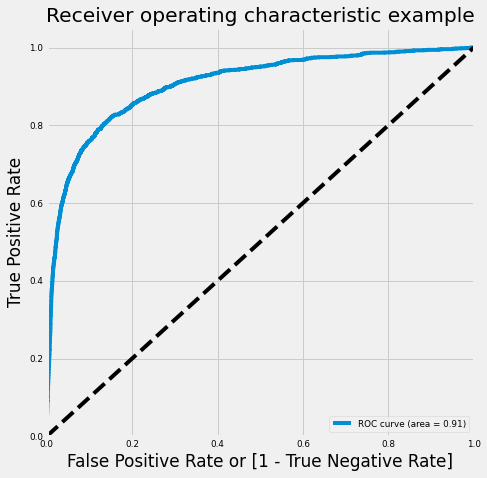

In [91]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_imbalanced, X_train_sm_imbalanced, y_train)

In [92]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.05 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87     19067
           1       0.25      0.87      0.39      1646

    accuracy                           0.79     20713
   macro avg       0.62      0.82      0.63     20713
weighted avg       0.93      0.79      0.83     20713

Accuracy Score   :  0.7852
Precision Score  :  0.2524
Recall Score     :  0.8682
F1 Score         :  0.3911
Area under curve :  0.8231 



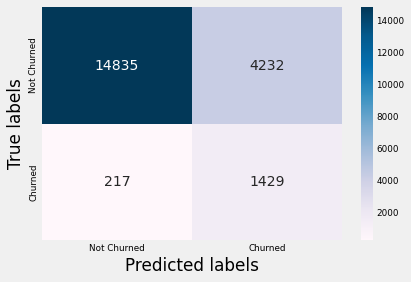

(0.7852, 0.2524, 0.8682, 0.3911, 0.8231)

In [93]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train, y_train_pred_final['final_predicted_1'])

In [94]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_imbalanced, 
                                                      X_test[imbalanced_rfe_features], 
                                                      y_test, cutoff=0.05) 
y_test_pred_final.head()

,churn,Churned_Prob,final_predicted
0,0,0.015070,0
1,0,0.016411,0
2,0,0.128227,1
3,0,0.000909,0
4,0,0.058927,1


Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      8182
           1       0.25      0.86      0.39       696

    accuracy                           0.79      8878
   macro avg       0.62      0.82      0.63      8878
weighted avg       0.93      0.79      0.83      8878

Accuracy Score   :  0.7877
Precision Score  :  0.2512
Recall Score     :  0.8621
F1 Score         :  0.389
Area under curve :  0.8217 



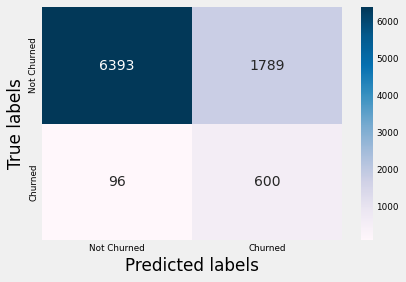

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.389,0.8217


In [95]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression on imbalanced data without PCA'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# PCA
STEPS :
Perform PCA on the whole training dataset to identify number of features
Create 25 Principal components covering 90% of the data.
Predict using the training data
Decide the probability cutoff to decide if a customer has churned or not
Evaluate the metrics on the training data prediction
Predict using the test data and the decided cutoff
Evaluate the metrics on the test data prediction

In [96]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (10,6))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [97]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print("Shape of X train PCA : ", X_train_pca.shape)
    print("Shape of Y train PCA : ", y_train.shape)
    print("Shape of X test PCA : ", X_test_pca.shape)
    print("Shape of Y test PCA : ", y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (10,8))
    sns.heatmap(corrmat, annot = False,cmap="RdYlGn",linewidth =1)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    
    return X_train_pca, X_test_pca

# Logistic Regression with PCA and handling imbalance using random over sampling technique

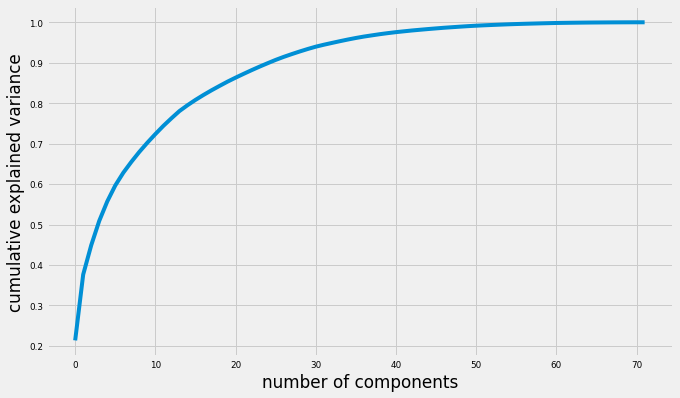

In [98]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_r_over_sampled)

Shape of X train PCA :  (38134, 25)
Shape of Y train PCA :  (38134, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


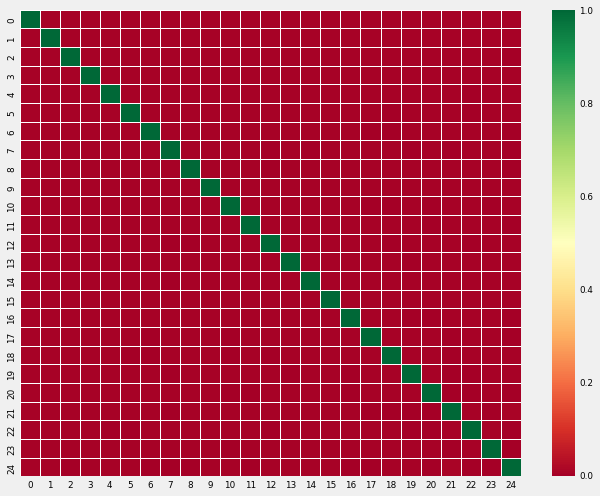

max corr: 0.004126819713404399 , min corr:  -0.004477104343219081


In [99]:
# Step 1.2 : Create 25 Principal components
X_train_pca_ro, X_test_pca_ro = perform_incremental_PCA(X_r_over_sampled, y_r_over_sampled, 25)

In [100]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced = build_logistic_model(X_train_pca_ro, y_r_over_sampled.values.ravel())
logistic_model_pca_r_over_balanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14971.
Date:                Wed, 15 Mar 2023   Deviance:                       29943.
Time:                        16:26:49   Pearson chi2:                 4.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4518
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.016      2.838      0.005       0.014       0.075
0             -0.3362      0.004    -78.345      0.000      -0.345      -0.328
1             -0.4622      0.005    -84.084      0.000      -0.473      -0.451
2              0.1707      0.007     26.154      0.000       0.158       0.184
3              0.1032      0.007     14.061      0.000       0.089       0.118
4              0.4778      0.009     50.433      0.000       0.459       0.496
5             -0.0238      0.009     -2.747      0.006      -0.041      -0.007
6              0.2202      0.010     21.953      0.000       0.201       0.240
7             -0.0557      0.011     -5.022      0.000      -0.077      -0.034
8             -0.1328      0.012    -11.331      0.000      -0.156      -0.110
9             -0.1566      0.012    -13.307      0.000      -0.180      -0.134
10            -0.0323      0.012     -2.624      0.009      -0.056      -0.008
11            -0.3635      0.013    -27.745      0.000      -0.389      -0.338
12            -0.0240      0.013     -1.795      0.073      -0.050       0.002
13            -0.1008      0.014     -7.270      0.000      -0.128      -0.074
14             0.0007      0.015      0.048      0.962      -0.029       0.030
15             0.0008      0.015      0.056      0.955      -0.029       0.030
16            -0.0662      0.016     -4.057      0.000      -0.098      -0.034
17             0.0298      0.017      1.749      0.080      -0.004       0.063
18             0.1190      0.018      6.790      0.000       0.085       0.153
19             0.0396      0.018      2.148      0.032       0.003       0.076
20            -0.0714      0.018     -3.882      0.000      -0.107      -0.035
21            -0.1154      0.019     -6.039      0.000      -0.153      -0.078
22            -0.0904      0.019     -4.745      0.000      -0.128      -0.053
23            -0.3197      0.023    -13.753      0.000      -0.365      -0.274
24             0.0317      0.021      1.496      0.135      -0.010       0.073
==============================================================================
"""

As we can see from the summary, PCA models have PCA components as features and so its not interpretable. We can skip printing this part in the further PCA models.

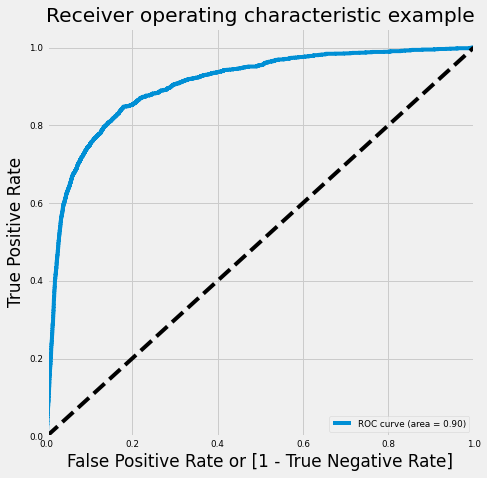

In [101]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced, y_r_over_sampled)

In [102]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns of all other cutoff

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     19067
           1       0.83      0.84      0.83     19067

    accuracy                           0.83     38134
   macro avg       0.83      0.83      0.83     38134
weighted avg       0.83      0.83      0.83     38134

Accuracy Score   :  0.8327
Precision Score  :  0.8272
Recall Score     :  0.8411
F1 Score         :  0.8341
Area under curve :  0.8327 



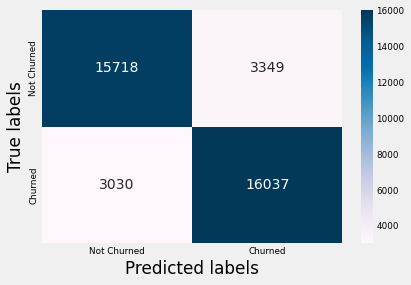

(0.8327, 0.8272, 0.8411, 0.8341, 0.8327)

In [103]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_r_over_sampled, y_train_pred_final['final_predicted_1'])

In [104]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_r_over_balanced, X_test_pca_ro, y_test, cutoff=0.45) 
y_test_pred_final.head()

,churn,Churned_Prob,final_predicted
0,0,0.092685,0
1,0,0.095762,0
2,0,0.273469,0
3,0,0.024419,0
4,0,0.278425,0


Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8182
           1       0.30      0.84      0.44       696

    accuracy                           0.83      8878
   macro avg       0.64      0.84      0.67      8878
weighted avg       0.93      0.83      0.86      8878

Accuracy Score   :  0.8319
Precision Score  :  0.2974
Recall Score     :  0.8391
F1 Score         :  0.4391
Area under curve :  0.8352 



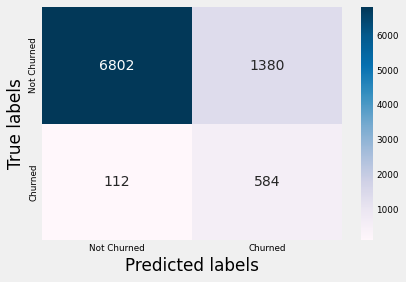

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352


In [105]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & Random over sampling'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Logistic Regression with PCA and handling imbalance using random under sampling technique

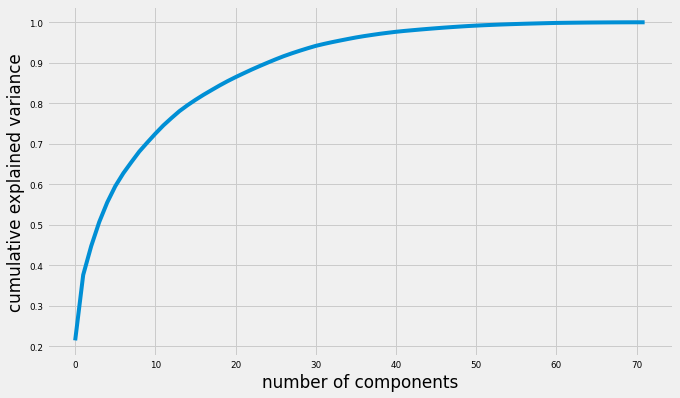

In [106]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_r_under_sampled)

Shape of X train PCA :  (3292, 25)
Shape of Y train PCA :  (3292, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


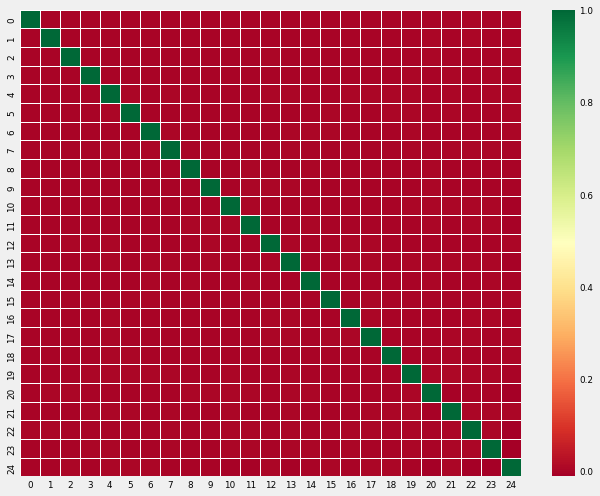

max corr: 0.005017427968907772 , min corr:  -0.011513044094550305


In [107]:
X_train_pca_ru, X_test_pca_run = perform_incremental_PCA(X_r_under_sampled, y_r_under_sampled, 25)

In [108]:
#Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_under_sampled, X_train_sm_pca_under_sampled = build_logistic_model(X_train_pca_ru, y_r_under_sampled.values.ravel())

# Skip as the features are PCA uninterpretable components
# logistic_model_pca_under_sampled.summary() 

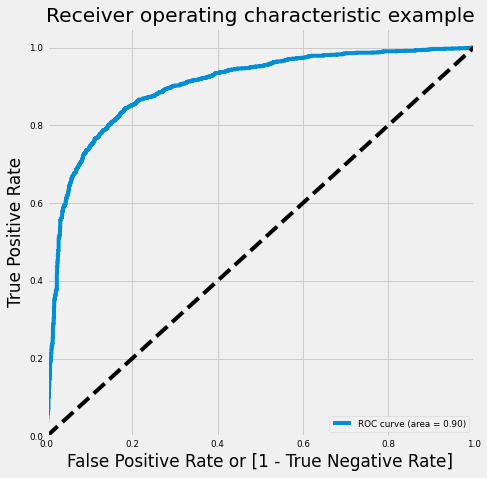

In [109]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_under_sampled, X_train_sm_pca_under_sampled, y_r_under_sampled)

In [110]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1646
           1       0.82      0.84      0.83      1646

    accuracy                           0.83      3292
   macro avg       0.83      0.83      0.83      3292
weighted avg       0.83      0.83      0.83      3292

Accuracy Score   :  0.8281
Precision Score  :  0.8226
Recall Score     :  0.8366
F1 Score         :  0.8295
Area under curve :  0.8281 



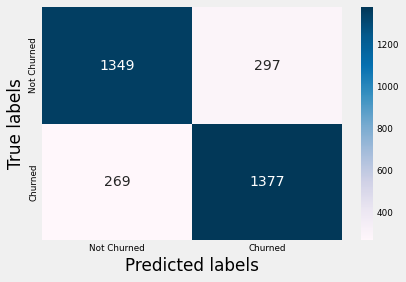

(0.8281, 0.8226, 0.8366, 0.8295, 0.8281)

In [111]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_r_under_sampled, y_train_pred_final['final_predicted_1'])

In [112]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_under_sampled, X_test_pca_run, y_test, cutoff=0.45) 
y_test_pred_final.head()

,churn,Churned_Prob,final_predicted
0,0,0.129628,0
1,0,0.093461,0
2,0,0.246154,0
3,0,0.029340,0
4,0,0.305963,0


Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8182
           1       0.30      0.83      0.44       696

    accuracy                           0.83      8878
   macro avg       0.64      0.83      0.67      8878
weighted avg       0.93      0.83      0.86      8878

Accuracy Score   :  0.8312
Precision Score  :  0.2957
Recall Score     :  0.8348
F1 Score         :  0.4367
Area under curve :  0.8328 



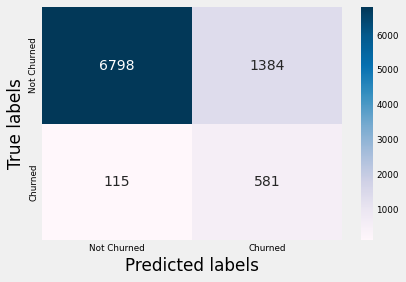

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328


In [113]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & Random under sampling'],
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Logistic Regression with PCA and handling imbalance using SMOTE technique

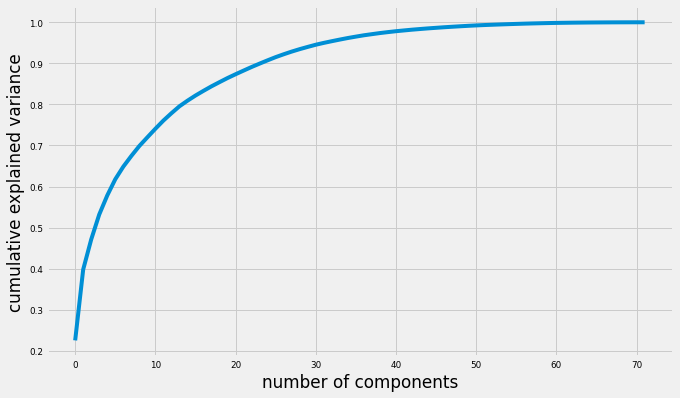

In [114]:
# Step1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_smote_samples)

In [115]:
X_train.shape

(20713, 72)

Shape of X train PCA :  (38134, 25)
Shape of Y train PCA :  (38134, 1)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


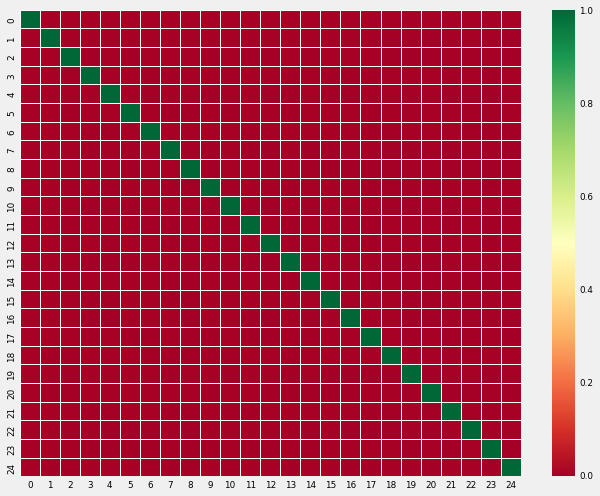

max corr: 0.0025784808844032396 , min corr:  -0.003985032842779876


In [116]:
# Step 2 : Create 25 Principal components
X_train_pca_smote, X_test_pca_smote = perform_incremental_PCA(X_smote_samples, y_smote_samples, 25)

There is no correlation between any two components which is good for proceeding

In [117]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_smote, X_train_sm_pca_smote = build_logistic_model(X_train_pca_smote, y_smote_samples.values.ravel())

# Skip as the features are PCA uninterpretable components
# logistic_model_pca_smote.summary() 

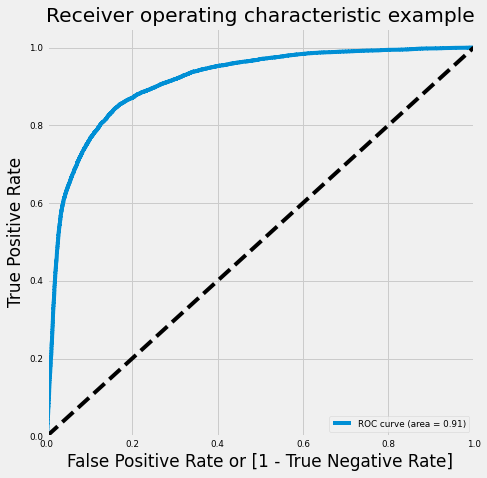

In [118]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_smote, X_train_sm_pca_smote, y_smote_samples)

In [119]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     19067
           1       0.83      0.85      0.84     19067

    accuracy                           0.84     38134
   macro avg       0.84      0.84      0.84     38134
weighted avg       0.84      0.84      0.84     38134

Accuracy Score   :  0.8413
Precision Score  :  0.8337
Recall Score     :  0.8527
F1 Score         :  0.8431
Area under curve :  0.8413 



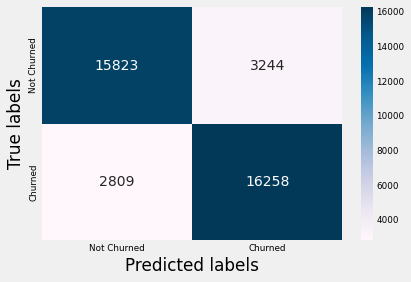

(0.8413, 0.8337, 0.8527, 0.8431, 0.8413)

In [120]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_smote_samples, y_train_pred_final['final_predicted_1'])

In [121]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_smote, X_test_pca_smote, y_test, cutoff=0.45) 
y_test_pred_final.head()

,churn,Churned_Prob,final_predicted
0,0,0.066030,0
1,0,0.079165,0
2,0,0.288579,0
3,0,0.014339,0
4,0,0.242444,0


Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      8182
           1       0.30      0.83      0.44       696

    accuracy                           0.84      8878
   macro avg       0.64      0.83      0.67      8878
weighted avg       0.93      0.84      0.87      8878

Accuracy Score   :  0.8361
Precision Score  :  0.302
Recall Score     :  0.8319
F1 Score         :  0.4432
Area under curve :  0.8342 



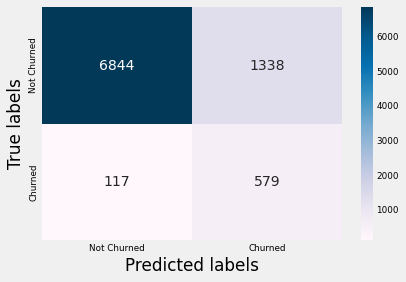

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342


In [122]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & SMOTE'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall],
                            'F1 score': [f1],
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Logistic Regression with PCA and handling imbalance using SMOTEEN technique

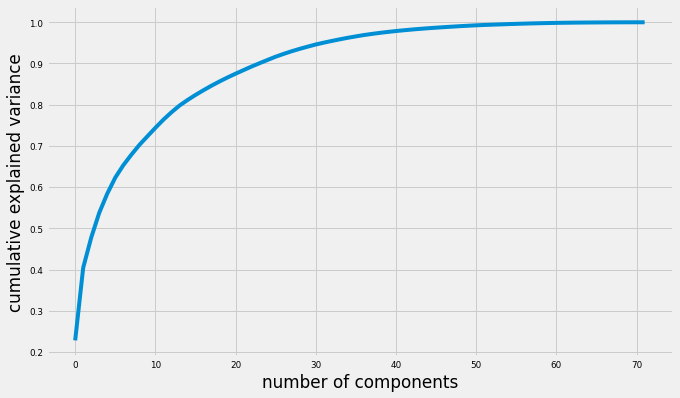

In [123]:
# Step 1.1: Perform PCA on the whole training dataset to identify number of features
perform_PCA(X_train_resampled)

Looks like less than 25 components are enough to describe 90% of the variance in the dataset. Let's choose 25 components for modeling.

Shape of X train PCA :  (34146, 25)
Shape of Y train PCA :  (34146,)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


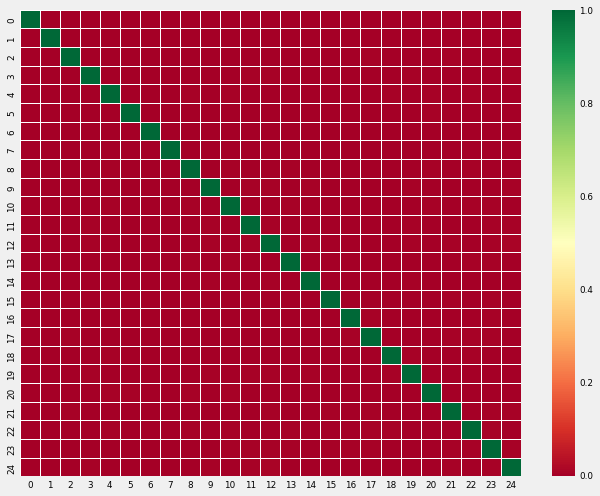

max corr: 0.00497270418571219 , min corr:  -0.0033188177971013436


In [124]:
# Step: Create 25 Principal components
X_train_pca_smoteen, X_test_pca_smoteen = perform_incremental_PCA(X_train_resampled, y_train_resampled, 25)

In [125]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_smoteen, X_train_sm_pca_smoteen = build_logistic_model(X_train_pca_smoteen, y_train_resampled.values.ravel())
# Skip as the features are PCA uninterpretable components
# logistic_model_pca_smoteen.summary() 

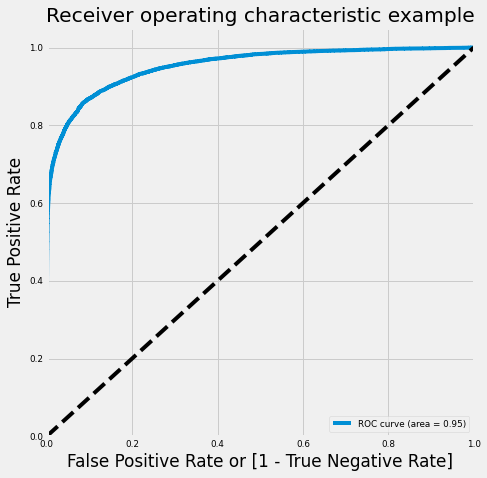

In [126]:
# Step 3: Predict using the training data
y_train_pred_final = predict_train_using_logistic_model(logistic_model_pca_smoteen, X_train_sm_pca_smoteen, y_train_resampled)

In [127]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.46
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86     15103
           1       0.89      0.89      0.89     19043

    accuracy                           0.88     34146
   macro avg       0.88      0.88      0.88     34146
weighted avg       0.88      0.88      0.88     34146

Accuracy Score   :  0.8795
Precision Score  :  0.891
Recall Score     :  0.8933
F1 Score         :  0.8922
Area under curve :  0.8777 



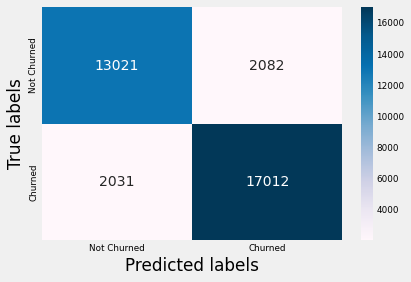

(0.8795, 0.891, 0.8933, 0.8922, 0.8777)

In [128]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train_resampled, y_train_pred_final['final_predicted_1'])

In [129]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = predict_test_using_logistic_model(logistic_model_pca_smoteen, X_test_pca_smoteen, y_test, cutoff=0.46) 
y_test_pred_final.head()

,churn,Churned_Prob,final_predicted
0,0,0.050598,0
1,0,0.057240,0
2,0,0.371529,0
3,0,0.008749,0
4,0,0.283711,0


Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      8182
           1       0.25      0.88      0.39       696

    accuracy                           0.78      8878
   macro avg       0.62      0.83      0.63      8878
weighted avg       0.93      0.78      0.83      8878

Accuracy Score   :  0.7841
Precision Score  :  0.2505
Recall Score     :  0.8807
F1 Score         :  0.3901
Area under curve :  0.8283 



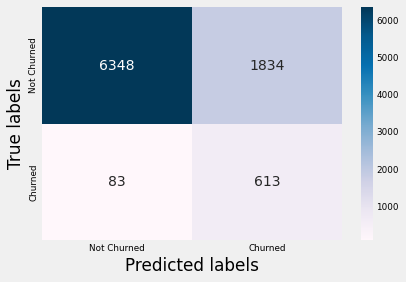

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283


In [130]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & SMOTEENN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Logistic Regression with PCA and handling imbalance using SMOTEEN technique with regularization penalty

Shape of X train PCA :  (34146, 25)
Shape of Y train PCA :  (34146,)
Shape of X test PCA :  (8878, 25)
Shape of Y test PCA :  (8878, 1)


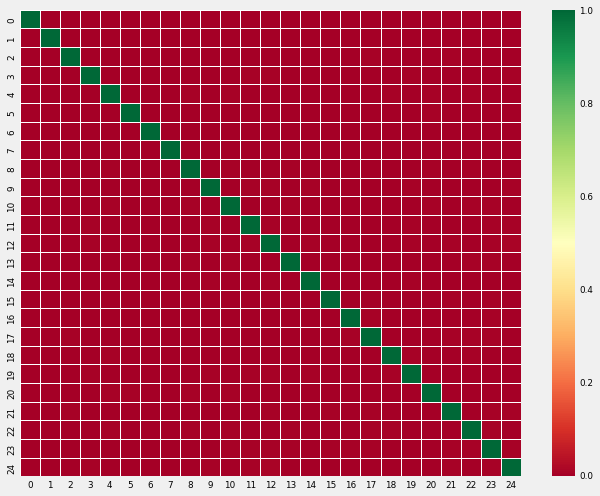

max corr: 0.00497270418571219 , min corr:  -0.0033188177971013436


In [131]:
# Step 1: Create 25 principal components
X_train_pca_reg, X_test_pca_reg = perform_incremental_PCA(X_train_resampled, y_train_resampled, 25)

In [132]:
# Step 2.1: Hyper parameter tuning: Decide whether to apply l1 or l2 penalty using GridSearchCV
lr = LogisticRegression(n_jobs = -1, random_state = 100)
parameter = 'penalty'
param_grid = {parameter: ['l1', 'l2']} # parameters to build the model on

gc = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'roc_auc', n_jobs = 15, cv = 5, verbose = 2)
gc = gc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# scores of GridSearch CV
scores = gc.cv_results_    

# Get the best value
gc.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'penalty': 'l2'}

Fitting 5 folds for each of 4 candidates, totalling 20 fits


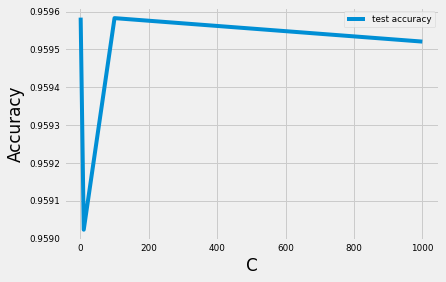

{'C': 1}

In [133]:
# Step 2.2: Hyper parameter tuning: Decide penalty value of 'c' for L2 regularization
lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 100)
parameter = 'C'
param_grid = {parameter: [1, 10, 100, 1000]} # parameters to build the model on

gc = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'roc_auc', n_jobs = 15, cv = 5, verbose = 2)
gc = gc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
col = "param_" + parameter
    
#plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")

plt.xlabel(parameter)
plt.ylabel("Accuracy")

plt.legend()
plt.show()

# Get the best value
gc.best_params_

In [134]:
# Step 3: Build logistic model with regularization penalty and Principal components

lr = LogisticRegression(penalty = 'l2', C = 1, n_jobs = -1, random_state = 100)
logistic_model_pca_smoteen_reg = lr.fit(X_train_pca_reg.values, y_train_resampled.values.ravel())

In [135]:
# Step 4: Predict using the training data
y_train_pred_final = logistic_model_pca_smoteen_reg.predict(X_train_pca_reg.values)
y_train_pred_final

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87     15103
           1       0.90      0.88      0.89     19043

    accuracy                           0.88     34146
   macro avg       0.88      0.88      0.88     34146
weighted avg       0.88      0.88      0.88     34146

Accuracy Score   :  0.8816
Precision Score  :  0.9027
Recall Score     :  0.8829
F1 Score         :  0.8927
Area under curve :  0.8814 



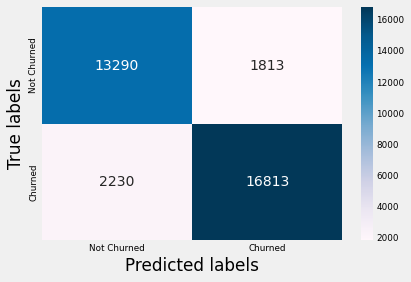

(0.8816, 0.9027, 0.8829, 0.8927, 0.8814)

In [136]:
# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train_resampled, y_train_pred_final)

In [137]:
#Step 6: Predict on the test dataset
y_test_pred_final = logistic_model_pca_smoteen_reg.predict(X_test_pca_reg.values)
y_test_pred_final

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      8182
           1       0.27      0.87      0.41       696

    accuracy                           0.80      8878
   macro avg       0.63      0.83      0.65      8878
weighted avg       0.93      0.80      0.84      8878

Accuracy Score   :  0.8029
Precision Score  :  0.2674
Recall Score     :  0.8707
F1 Score         :  0.4092
Area under curve :  0.8339 



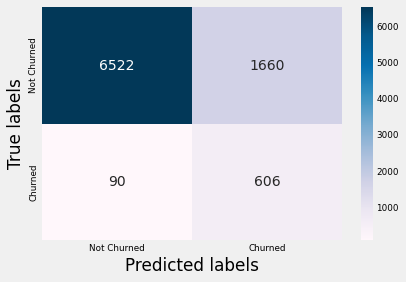

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339


In [138]:
#Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final)

tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA, SMOTEEN, L2 regularization'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1],
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Support Vector Machine (SVM)

In [139]:
# We we create a new model for SVM with hyperparameter tuning process selected best parameters 
#best parameters : 'C' : 0.1 'gamma':0.5
model_svm = SVC(C = 0.1,gamma = 0.5,kernel = 'linear', probability = True, random_state = 100)
model_svm.fit(X_train_resampled,y_train_resampled)

SVC(C=0.1, gamma=0.5, kernel='linear', probability=True, random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     19067
           1       0.29      0.87      0.43      1646

    accuracy                           0.82     20713
   macro avg       0.64      0.84      0.66     20713
weighted avg       0.93      0.82      0.86     20713

Accuracy Score   :  0.8184
Precision Score  :  0.287
Recall Score     :  0.8657
F1 Score         :  0.4311
Area under curve :  0.84 



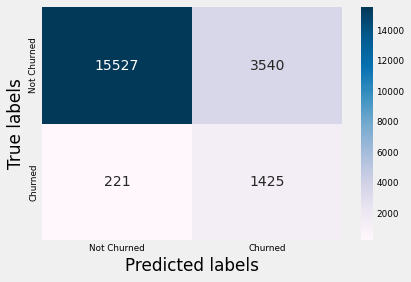

(0.8184, 0.287, 0.8657, 0.4311, 0.84)

In [140]:
# Checking the performance on the train dataset
y_train_svm = model_svm.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_svm)

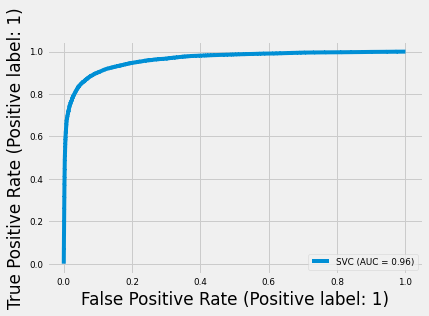

In [141]:
#Checking the AUC ROC Curve
plot_roc_curve(model_svm, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      8182
           1       0.29      0.86      0.44       696

    accuracy                           0.82      8878
   macro avg       0.64      0.84      0.67      8878
weighted avg       0.93      0.82      0.86      8878

Accuracy Score   :  0.8246
Precision Score  :  0.2913
Recall Score     :  0.8635
F1 Score         :  0.4357
Area under curve :  0.8424 



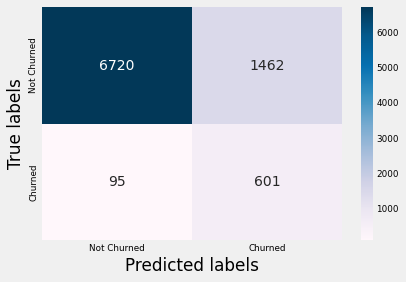

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424


In [142]:
# Evaluate the metrics on the test data set

y_test_svm = model_svm.predict(X_test)
print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_svm)

tempResults = pd.DataFrame({'Model':['SVM with SMOTEENN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Random Forest
Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample. Both bagging and random forests have proven effective on a wide range of different predictive modeling problems.Although effective, they are not suited to classification problems with a skewed class distribution. We will two approach with RandomForest. First method is by using class_weight based on imbalance data. Second is to use resampled data using SMOTEENN technique.

In [143]:
# Running RandomForestClassifier without hyper parameter tuning with the actual train and test data data
model_rf = RandomForestClassifier(random_state = 100, n_estimators= 100,n_jobs =-1, class_weight = {0:1,1:9})
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 9}, n_jobs=-1, random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19067
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     20713
   macro avg       1.00      1.00      1.00     20713
weighted avg       1.00      1.00      1.00     20713

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
F1 Score         :  1.0
Area under curve :  1.0 



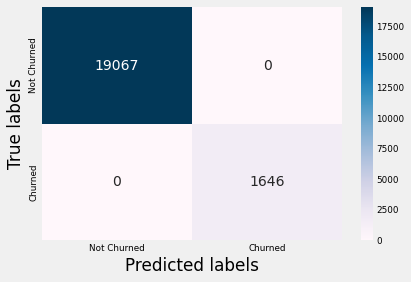

(1.0, 1.0, 1.0, 1.0, 1.0)

In [144]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

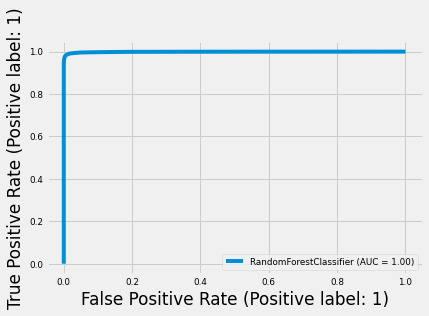

In [145]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8182
           1       0.78      0.43      0.56       696

    accuracy                           0.95      8878
   macro avg       0.87      0.71      0.76      8878
weighted avg       0.94      0.95      0.94      8878

Accuracy Score   :  0.9459
Precision Score  :  0.7798
Recall Score     :  0.4325
F1 Score         :  0.5564
Area under curve :  0.711 



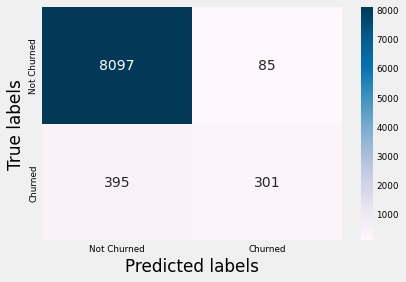

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
0,Random Forest with class_weight,0.9459,0.7798,0.4325,0.5564,0.7110


In [146]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with class_weight'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

In [147]:
# Running RandomForestClassifier without hyper parameter tuning with the resampled data
model_rf = RandomForestClassifier(random_state = 100, n_estimators= 100,n_jobs =-1)
model_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     19067
           1       0.56      1.00      0.71      1646

    accuracy                           0.94     20713
   macro avg       0.78      0.96      0.84     20713
weighted avg       0.96      0.94      0.94     20713

Accuracy Score   :  0.9368
Precision Score  :  0.5569
Recall Score     :  0.9982
F1 Score         :  0.715
Area under curve :  0.9648 



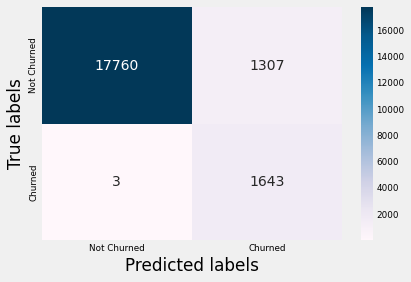

(0.9368, 0.5569, 0.9982, 0.715, 0.9648)

In [148]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

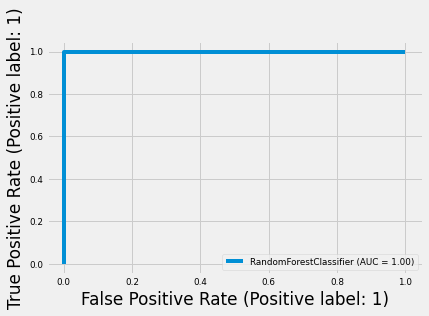

In [149]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      8182
           1       0.45      0.74      0.56       696

    accuracy                           0.91      8878
   macro avg       0.72      0.83      0.76      8878
weighted avg       0.94      0.91      0.92      8878

Accuracy Score   :  0.9097
Precision Score  :  0.4535
Recall Score     :  0.7428
F1 Score         :  0.5632
Area under curve :  0.8333 



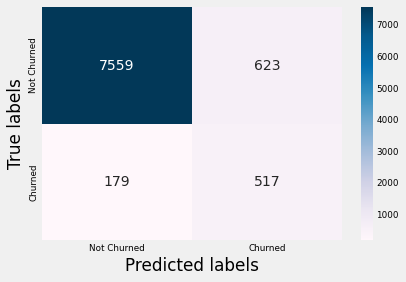

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
0,Random Forest with class_weight,0.9459,0.7798,0.4325,0.5564,0.7110
0,Random Forest with SMOTEENN,0.9097,0.4535,0.7428,0.5632,0.8333


In [150]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)
print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with SMOTEENN'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

In [151]:
# Let's build the model using the hyperparameters we got from GridSearchCV
model_rf = RandomForestClassifier(random_state = 100, n_jobs =-1,
                                  n_estimators= 500,
                                  max_depth = 30,
                                  max_features = 'auto',
                                  min_samples_leaf = 100,
                                  min_samples_split=200,
                                  criterion ='gini')
model_rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=100,
                       min_samples_split=200, n_estimators=500, n_jobs=-1,
                       random_state=100)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     19067
           1       0.34      0.85      0.49      1646

    accuracy                           0.86     20713
   macro avg       0.66      0.86      0.70     20713
weighted avg       0.93      0.86      0.88     20713

Accuracy Score   :  0.859
Precision Score  :  0.3439
Recall Score     :  0.8536
F1 Score         :  0.4903
Area under curve :  0.8565 



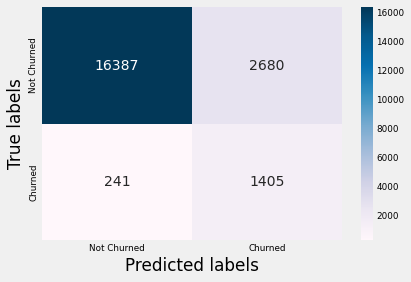

(0.859, 0.3439, 0.8536, 0.4903, 0.8565)

In [152]:
# Checking the performance of the train dataset
y_train_rf = model_rf.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

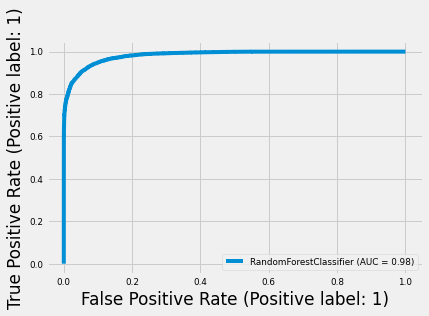

In [153]:
#Checking the AUC ROC Curve
plot_roc_curve(model_rf, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.82      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.84      0.70      8878
weighted avg       0.93      0.86      0.88      8878

Accuracy Score   :  0.8598
Precision Score  :  0.3379
Recall Score     :  0.8218
F1 Score         :  0.4789
Area under curve :  0.8424 



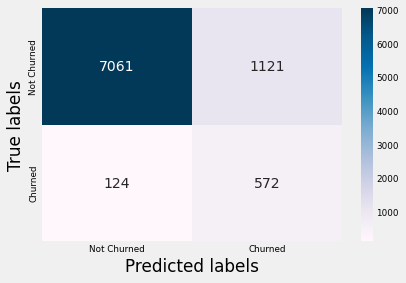

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
0,Random Forest with class_weight,0.9459,0.7798,0.4325,0.5564,0.7110
0,Random Forest with SMOTEENN,0.9097,0.4535,0.7428,0.5632,0.8333
0,Random Forest with SMOTEENN & Hyperparameter t...,0.8598,0.3379,0.8218,0.4789,0.8424


In [154]:
# Checking the performance on the test dataset
y_test_rf = model_rf.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_rf)

tempResults = pd.DataFrame({'Model':['Random Forest with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# AdaBoost

In [155]:
model_ada = AdaBoostClassifier(learning_rate=0.05,n_estimators = 500)
model_ada.fit(X_train_resampled,y_train_resampled)

AdaBoostClassifier(learning_rate=0.05, n_estimators=500)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     19067
           1       0.31      0.84      0.45      1646

    accuracy                           0.84     20713
   macro avg       0.64      0.84      0.68     20713
weighted avg       0.93      0.84      0.87     20713

Accuracy Score   :  0.8353
Precision Score  :  0.3056
Recall Score     :  0.8433
F1 Score         :  0.4486
Area under curve :  0.8389 



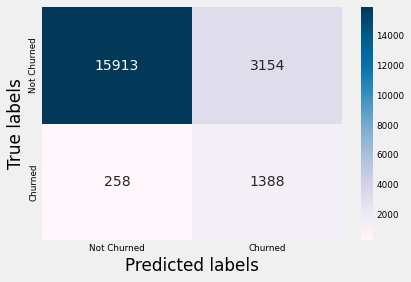

(0.8353, 0.3056, 0.8433, 0.4486, 0.8389)

In [156]:
# Checking the performance of the train dataset
y_train_ada = model_ada.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_ada)

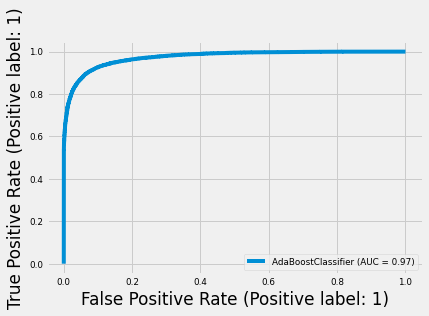

In [157]:
#Checking the AUC ROC Curve
plot_roc_curve(model_ada, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8182
           1       0.31      0.84      0.45       696

    accuracy                           0.84      8878
   macro avg       0.65      0.84      0.68      8878
weighted avg       0.93      0.84      0.87      8878

Accuracy Score   :  0.8388
Precision Score  :  0.3073
Recall Score     :  0.842
F1 Score         :  0.4502
Area under curve :  0.8403 



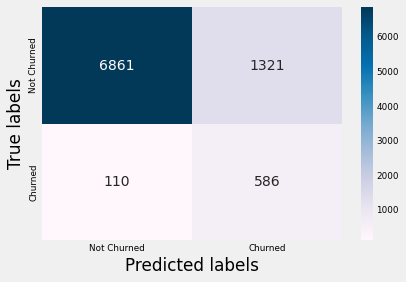

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
0,Random Forest with class_weight,0.9459,0.7798,0.4325,0.5564,0.7110
0,Random Forest with SMOTEENN,0.9097,0.4535,0.7428,0.5632,0.8333
0,Random Forest with SMOTEENN & Hyperparameter t...,0.8598,0.3379,0.8218,0.4789,0.8424


In [158]:
# Checking the performance on the test dataset
y_test_ada = model_ada.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_ada)

tempResults = pd.DataFrame({'Model':['AdaBoost with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# XGBoost

In [159]:
model_xgb = XGBClassifier(learning_rate=0.01, 
                          n_estimators=300, 
                          max_depth=4, 
                          min_child_weight=10, 
                          gamma=0.6,
                          nthread=4, 
                          subsample=0.4,
                          colsample_bytree=0.6,
                          reg_alpha=10,
                          reg_lambda=2)
model_xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=10, ...)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19067
           1       0.33      0.84      0.48      1646

    accuracy                           0.85     20713
   macro avg       0.66      0.85      0.69     20713
weighted avg       0.93      0.85      0.88     20713

Accuracy Score   :  0.8521
Precision Score  :  0.331
Recall Score     :  0.8439
F1 Score         :  0.4755
Area under curve :  0.8483 



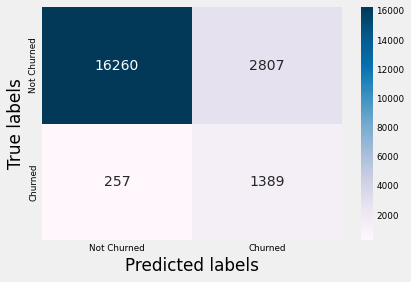

(0.8521, 0.331, 0.8439, 0.4755, 0.8483)

In [160]:
# Checking the performance of the train dataset
y_train_xgb = model_xgb.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_xgb)

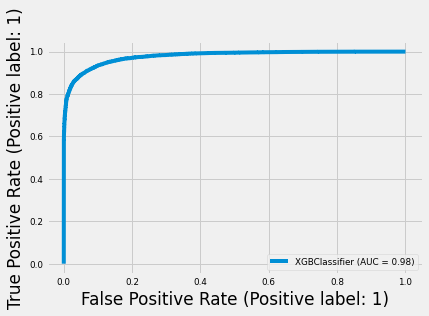

In [161]:
#Checking the AUC ROC Curve
plot_roc_curve(model_xgb, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.84      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.85      0.70      8878
weighted avg       0.93      0.86      0.88      8878

Accuracy Score   :  0.8598
Precision Score  :  0.3398
Recall Score     :  0.8362
F1 Score         :  0.4832
Area under curve :  0.849 



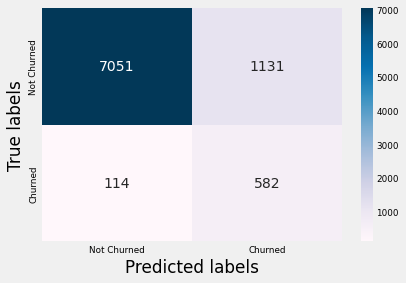

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
0,Random Forest with class_weight,0.9459,0.7798,0.4325,0.5564,0.7110
0,Random Forest with SMOTEENN,0.9097,0.4535,0.7428,0.5632,0.8333
0,Random Forest with SMOTEENN & Hyperparameter t...,0.8598,0.3379,0.8218,0.4789,0.8424


In [162]:
# Checking the performance on the test dataset
y_test_xgb = model_xgb.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_xgb)

tempResults = pd.DataFrame({'Model':['XGBoost with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# LightGBM

In [163]:
model_lgbm = LGBMClassifier(boosting_type='gbdt',
                            n_estimators=300,
                            learning_rate=0.0008, 
                            max_depth=20, 
                            min_child_samples=100,
                            num_leaves=50, 
                            objective='binary', 
                            random_state=100,
                            subsample=1,
                            colsample_bytree=0.3,
                            n_jobs=-1,
                            silent=True)
model_lgbm.fit(X_train_resampled,y_train_resampled)

LGBMClassifier(colsample_bytree=0.3, learning_rate=0.0008, max_depth=20,
               min_child_samples=100, n_estimators=300, num_leaves=50,
               objective='binary', random_state=100, silent=True, subsample=1)

Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     19067
           1       0.23      0.95      0.36      1646

    accuracy                           0.74     20713
   macro avg       0.61      0.83      0.60     20713
weighted avg       0.93      0.74      0.80     20713

Accuracy Score   :  0.7364
Precision Score  :  0.2255
Recall Score     :  0.9514
F1 Score         :  0.3646
Area under curve :  0.8346 



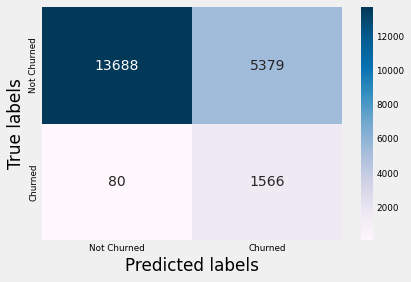

(0.7364, 0.2255, 0.9514, 0.3646, 0.8346)

In [164]:
# Checking the performance of the train dataset
y_train_lgbm = model_lgbm.predict(X_train)
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_lgbm)

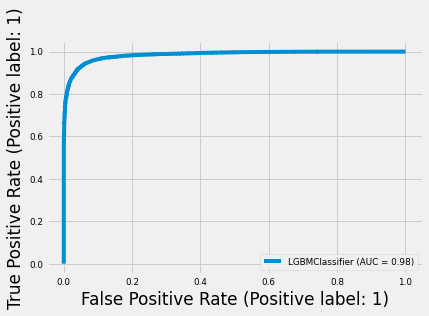

In [165]:
#Checking the AUC ROC Curve
plot_roc_curve(model_lgbm, X_train_resampled,y_train_resampled)
plt.show()

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      8182
           1       0.21      0.92      0.34       696

    accuracy                           0.72      8878
   macro avg       0.60      0.81      0.58      8878
weighted avg       0.93      0.72      0.79      8878

Accuracy Score   :  0.7236
Precision Score  :  0.2103
Recall Score     :  0.9167
F1 Score         :  0.3421
Area under curve :  0.8119 



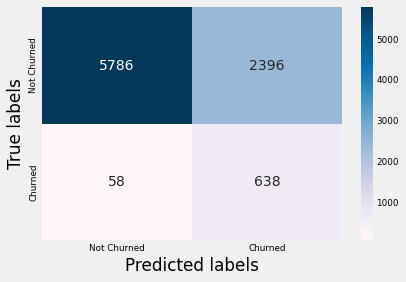

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
0,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
0,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
0,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342
0,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
0,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
0,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
0,Random Forest with class_weight,0.9459,0.7798,0.4325,0.5564,0.7110
0,Random Forest with SMOTEENN,0.9097,0.4535,0.7428,0.5632,0.8333
0,Random Forest with SMOTEENN & Hyperparameter t...,0.8598,0.3379,0.8218,0.4789,0.8424


In [166]:
# Checking the performance on the test dataset
y_test_lgbm = model_lgbm.predict(X_test)

print("Evaluation on test data set: \n")

accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test,y_test_lgbm)

tempResults = pd.DataFrame({'Model':['Light GBM with SMOTEENN & Hyperparameter tuned'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

# Final Model Selection

In [167]:
#Rearranging the dataframe 
results = results.sort_values("Recall", ascending = False).reset_index(drop=True)
results

,Model,Accuracy,Precision,Recall,F1 score,Area under ROC curve
0,Light GBM with SMOTEENN & Hyperparameter tuned,0.7236,0.2103,0.9167,0.3421,0.8119
1,Logistic Regression with PCA & SMOTEENN,0.7841,0.2505,0.8807,0.3901,0.8283
2,"Logistic Regression with PCA, SMOTEEN, L2 regu...",0.8029,0.2674,0.8707,0.4092,0.8339
3,SVM with SMOTEENN,0.8246,0.2913,0.8635,0.4357,0.8424
4,Logistic Regression on imbalanced data without...,0.7877,0.2512,0.8621,0.3890,0.8217
5,AdaBoost with SMOTEENN & Hyperparameter tuned,0.8388,0.3073,0.8420,0.4502,0.8403
6,Logistic Regression with PCA & Random over sam...,0.8319,0.2974,0.8391,0.4391,0.8352
7,XGBoost with SMOTEENN & Hyperparameter tuned,0.8598,0.3398,0.8362,0.4832,0.8490
8,Logistic Regression with PCA & Random under sa...,0.8312,0.2957,0.8348,0.4367,0.8328
9,Logistic Regression with PCA & SMOTE,0.8361,0.3020,0.8319,0.4432,0.8342


# Feature Importance

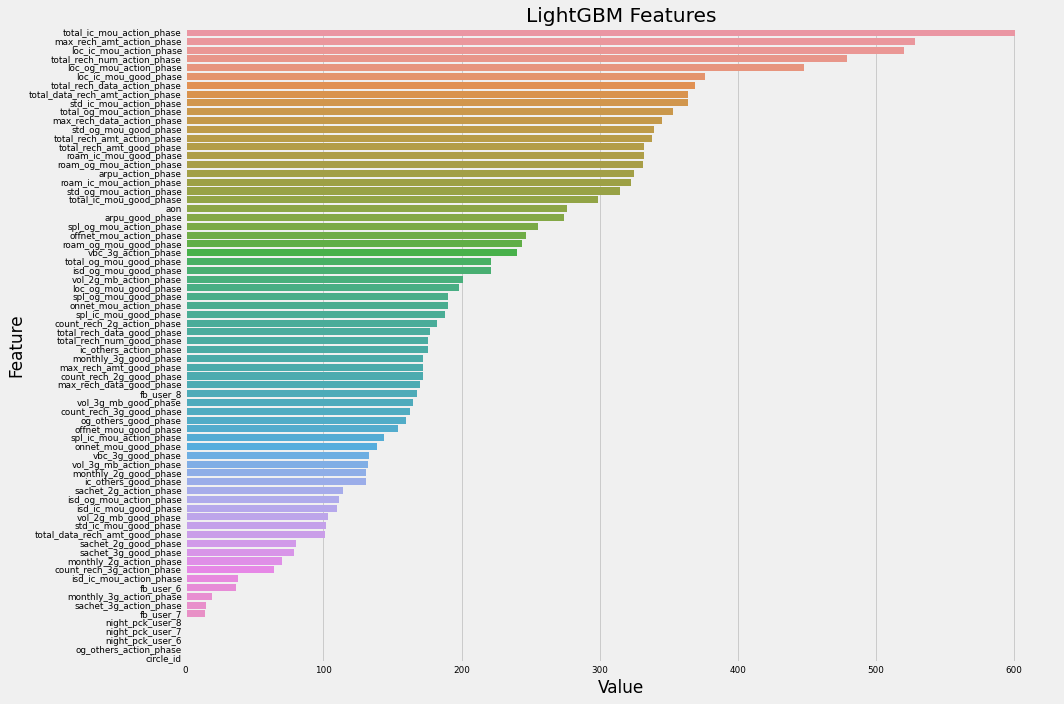

In [168]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [169]:
#Top 20 features : 
feature_imp=feature_imp.sort_values("Value",ascending = False)
feature_imp.head(20)

,Value,Feature
71,601,total_ic_mou_action_phase
70,528,max_rech_amt_action_phase
69,520,loc_ic_mou_action_phase
68,479,total_rech_num_action_phase
67,448,loc_og_mou_action_phase
66,376,loc_ic_mou_good_phase
65,369,total_rech_data_action_phase
64,364,total_data_rech_amt_action_phase
63,364,std_ic_mou_action_phase
62,353,total_og_mou_action_phase


# Business Recommendation